# Información previa

## Diseño y esquema codigo

1. Exploracion de los datos
    1. Segmentar los datos por los cluster de clientes
        - **Estudio de los comportamientos de demanda de cada cluster generico:**
        
        Plantear curvas de comportamiento de compra de cada cliente para cada cluster de clientes, de esta forma se visualizara si los clientes poseen estacionalidades similares a lo que respecta a las compras.

        - curvas etacionales de los precios de compra de cada cliente, para cada cluster de clientes
2. Creación de atributos
    1. __Stock__
        - Ajustar hora y valores 
    2. __Abastecimiento:__
        
        - Data demanda general.
        - Cruzar con el stock 
        - tomar en cuenta que los productos se pueden eliminar.
        Para el abastecimiento, se utilizarán 2 dias para definirlo
    
    3. __Demanda__
        - Definir valores.
        - Ajustar por medio del groupby, para que sea de cada cluster.
        - 
        

Los segmentos más llamativos a nivel demanda son **el 4 y el 2**

* **Segmento 2 MAYORISTA**
* **Segmento 4 FRECUENTES**

## Este es un extracto del paper:
 

	
Ventas pasadas con retraso  k, es decir, ventas diarias para el SKU considerado de los últimos k días (tw k : ventana de tiempo de tamaño k ).

	
* Variables binarias para caracterizar días especiales, como:
    * Pago , que caracteriza los días al final de cada mes cuando las personas reciben el pago mensual.
    * Pago intermedio , que caracteriza los días al final de cada quincena en que las personas reciben dos pagos semanales.
    * Antes de las vacaciones , caracterizando los días antes de las vacaciones.
    * Vacaciones , que caracterizan las vacaciones.
    * Independencia , que caracteriza los días de la independencia de Chile (18 y 19 de septiembre).
    * Santa , caracterizando los días de la semana antes del este.
    * Vacaciones , caracterizando los días que pertenecen al período de vacaciones de verano (enero y febrero).
    * Verano , que caracteriza los días de verano (1 de octubre-31 de marzo).	
    * Año nuevo (1 de enero), que caracteriza el único día de cierre de supermercados en Chile.
	
	
* Variables de precio:
    * Precio A  =  precio original del SKU considerado en Economax.
    * Precio B  =  (Precio A) / (Precio máximo en micro-mercado).
    * Precio C  =  (Precio A) / (Precio mínimo en micro-mercado).

		
Observación : Las variables “Precio máximo en micro-mercado” y “Precio mínimo en micro-mercado” son el precio máximo (mínimo) para un determinado SKU en el micro-mercado relevante y son proporcionados por una empresa de investigación de mercado.
		
	

	
 

# Package Install & Open Data


## Import

In [1]:
col,Str='Zona de ventas.1','Temuco'
def Df_ubic(data_X,col,Str):
    df=data_X.copy()
    df=df[df[col]==Str]
    return df

In [2]:
# =============================================================================
# Importar paquetes y abrir Data
# =============================================================================

#gestion DF
import pandas as pd

#Funciones mat y matricicales
import numpy as np

#ploteo simple
import matplotlib.pyplot as plt

# Graficas bonitas
from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

#mode function
import statistics 


##  Data Facturación CT

llega hasta el 2021
Esta data contiene las facturaciones(Ventas a los clientes del canal tradicional)

In [3]:
# =============================================================================
# Ajuste de los datos
# =============================================================================

col_names=pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data = pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [4]:
col,Str=('Oficina de Ventas Unifica','Temuco')
Data=Df_ubic(Data,col,Str)

### Ajuste facturaciones

In [5]:
#data[data['Día natural']>datetime.date(2021, 4, 12)]

In [6]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Kilos Venta KG','Venta Neta CLP','Precio Promedio CLP']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        df[i]=df[i].astype('int64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [7]:
data=Ajuste_data(Data)
data.head(3)
#data=<data[data['Año']>2018]

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
75186,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,15.2021,2021-04-12,LU,43,182668,4290,15,2021
75187,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,16.2021,2021-04-21,MI,43,157268,3690,16,2021
75188,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,17.2021,2021-04-26,LU,20,69393,3390,17,2021


##  Data Clientes
Esta data posee las caracteristicas de los clientes del canal tradicional

In [8]:
Cluster = pd.read_csv("Data/Cluster_clientes.csv",
                          encoding="utf-8",sep=";",dtype={'Cliente - Local.1': 'str'})

### Incluir Columna Cluster(Segmento de cliente)

In [9]:
DF_ventas=pd.merge(Cluster[['Cliente - Local.1','identified_clusters']] , data  
     , how='right')

In [10]:
DF_ventas.tail(3)

,Cliente - Local.1,identified_clusters,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,...,Cliente - Local,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
3870,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,10,42.2020,2020-10-13,MA,40,187863,4750,42,2020
3871,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,50.2019,2019-12-10,MA,37,99308,2692,50,2019
3872,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,49.2020,2020-12-01,MA,20,87176,4450,49,2020


## Data Stock
Esta data posee el nivel de stock de las sucursales de la zona de santiago

In [40]:
SKU='1020003'
fillN='Stock CL '+SKU
col_names=pd.read_csv("Data/last_down/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_stock = pd.read_csv("Data/last_down/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)
Data_stock.head()

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock
0,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,30.12.2019,8,"111,8"
1,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,31.12.2019,7,"111,8"
2,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,02.01.2020,5,"111,8"
3,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,03.01.2020,4,"111,8"
4,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,04.01.2020,3,"111,8"


In [41]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Stock']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        #df[i]=df[i].astype('int64')
        df[i]=df[i].astype('float64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    df['Vida Útil Restante']=df['Vida Útil Restante'].astype('int64')
    return df

In [42]:
Data_stock=Ajuste_data(Data_stock)

In [43]:
Data_stock.tail()

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock,Semana,Año
9933,Cerdo,1020003,Santiago,T015,Quilin,52.2020,2020-12-22,-544,0.0,52,2020
9934,Cerdo,1020003,Santiago,T015,Quilin,52.2020,2020-12-23,-546,0.0,52,2020
9935,Cerdo,1020003,Santiago,T015,Quilin,52.2020,2020-12-24,-548,0.0,52,2020
9936,Cerdo,1020003,Santiago,T015,Quilin,52.2020,2020-12-25,-550,0.0,52,2020
9937,Cerdo,1020003,Santiago,T015,Quilin,52.2020,2020-12-26,-552,0.0,52,2020


## Demanda Z001
Data_totales posee el DF de todas las ventas de Z001

In [44]:
fillN='Vetas Totales CL 1020003'
col_names=pd.read_csv("Data/last_down/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_totales = pd.read_csv("Data/last_down/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [45]:
col,Str='Oficina de Ventas Unifica','Temuco'
Data_totales=Df_ubic(Data_totales,col,Str)

In [46]:
Data_totales.describe(include='all')

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta,Precio Promedio
count,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243
unique,1,5,1,1,1,1,100,24,3,572,584,12,228,1281,6,363,9415,614
top,1020003,Supermercados,Z004,Sur,Temuco,T105,8000580079,Potencial,Sin asignar,Eltit San Luis,3200048452,2,48.2019,28.11.2019,VI,20,67.200,3.200
freq,11243,6290,11243,11243,11243,11243,1331,5252,7762,520,520,1458,118,40,2502,775,16,1352


### Ajuste data 

In [47]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    def delete_asterisco(x):
        x=str(x)
        return x.replace('*','0' )
    
    #proceso iterativo, 
    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
    # se elimina el punto definido para los miles
        if(i!='Kilos Venta KG'):
            df[i]=df[i].str.split('CLP', expand=True)[[0]]
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # se elimina el valor * 
        df[i]=df[i].apply(delete_asterisco)
        
        # Se pasa de ser un str a un int
        print(i)
        df[i]=df[i].astype('int64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [48]:
Data_totales=Ajuste_data(Data_totales)

Kilos Venta KG
Venta Neta
Precio Promedio


# Abastecimiento 
La Data de Demanda representa la demanda del dia anterior, para contrastarlo con el stock

## Demanda Dia Z001
representa la demanda del dia anterior, para contrastarlo con el stock

In [49]:
Data_totales['Tipo de cliente'].unique()

array(['Tradicional', 'Supermercados', 'Industriales', 'Grandes Clientes',
       'Foodservice'], dtype=object)

In [50]:
Demanda_dia_Zona=Data_totales.groupby('Día natural').sum().reset_index()[['Día natural', 'Kilos Venta KG']]
Demanda_dia_Zona.head()

,Día natural,Kilos Venta KG
0,2017-01-03,53
1,2017-01-04,276
2,2017-01-05,195
3,2017-01-06,357
4,2017-01-07,138


In [51]:
Demanda_dia_Zona.describe(include='all')

,Día natural,Kilos Venta KG
count,1281,1281.000000
unique,1281,NaN
top,2019-06-14,NaN
freq,1,NaN
mean,NaN,395.425449
std,NaN,421.110878
min,NaN,10.000000
25%,NaN,169.000000
50%,NaN,286.000000
75%,NaN,463.000000


## Stock  Dia Z001

In [52]:
Data_stock.tail(2)

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock,Semana,Año
9936,Cerdo,1020003,Santiago,T015,Quilin,52.2020,2020-12-25,-550,0.0,52,2020
9937,Cerdo,1020003,Santiago,T015,Quilin,52.2020,2020-12-26,-552,0.0,52,2020


Primera parte del calculo de la Vida Útil Restante Promedio

In [53]:
Data_stock['Vida Útil Restante']=Data_stock['Vida Útil Restante'].astype('float64')
Data_stock=Data_stock[Data_stock['Vida Útil Restante']>=3]
Data_stock=Data_stock[Data_stock['Vida Útil Restante']<=7]

Data_stock['Stock']=Data_stock['Stock'].astype('float64')
Data_stock['Vida Útil Restante Promedio']=Data_stock['Vida Útil Restante']*Data_stock['Stock']

### Stock total 

In [54]:
Data_stock=Data_stock.groupby('Día natural').sum().reset_index()[['Día natural', 'Stock','Vida Útil Restante Promedio']]


### Ajuste de fecha 

In [55]:
Data_stock['Día natural']=Data_stock['Día natural']+datetime.timedelta(days=1)
Data_stock['Día natural']

0      2019-11-28
1      2019-11-29
2      2019-12-01
3      2019-12-03
4      2019-12-04
          ...    
408    2021-05-20
409    2021-05-23
410    2021-05-25
411    2021-05-26
412    2021-05-27
Name: Día natural, Length: 413, dtype: object

In [56]:
#weekday_name[datetime.date(2021, 5, 10).weekday()]
Data_stock['Día natural']=Data_stock['Día natural'].apply(lambda x: 
                                                                    x+datetime.timedelta(days=1) 
                                                                    if(x.weekday() >= 6) else x)

### Vida util restante

In [57]:
Data_stock['Vida Útil Restante Promedio']=Data_stock['Vida Útil Restante Promedio']/Data_stock['Stock']
Data_stock.head()

,Día natural,Stock,Vida Útil Restante Promedio
0,2019-11-28,1154.0,4.00000
1,2019-11-29,592.3,3.00000
2,2019-12-02,958.4,4.00000
3,2019-12-03,146.6,6.00000
4,2019-12-04,824.1,6.79517


## Merge de Stock Demanda 

In [58]:
DF_VS=pd.merge(Demanda_dia_Zona[['Día natural', 'Kilos Venta KG']] 
               , Data_stock[['Día natural','Vida Útil Restante Promedio', 'Stock']]  
     , how='right')
DF_VS.sort_values(by=['Día natural'], inplace=True)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,4.00000,1154.0
1,2019-11-29,1843.0,3.00000,592.3
2,2019-12-02,233.0,4.00000,958.4
3,2019-12-03,254.0,6.00000,146.6
4,2019-12-04,483.0,6.79517,824.1


In [59]:
DF_VS['Kilos Venta KG']=DF_VS['Kilos Venta KG'].fillna(0)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,4.00000,1154.0
1,2019-11-29,1843.0,3.00000,592.3
2,2019-12-02,233.0,4.00000,958.4
3,2019-12-03,254.0,6.00000,146.6
4,2019-12-04,483.0,6.79517,824.1


In [60]:
DF_VS['Stock']=DF_VS['Stock'].fillna(0)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,4.00000,1154.0
1,2019-11-29,1843.0,3.00000,592.3
2,2019-12-02,233.0,4.00000,958.4
3,2019-12-03,254.0,6.00000,146.6
4,2019-12-04,483.0,6.79517,824.1


### Grafica 

In [61]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

Ploteo sin fondo

```
from plotnine import *
theme_set(theme_void())#sin fondo
theme_set(theme_classic())
theme_set(theme_bw())
theme_set(theme_gray())#basico
GRafico

grafico.save('Prueba.png',dpi=1000)

dpi es la densidad de los pixeles
```

In [62]:
DF_VS[DF_VS['Vida Útil Restante Promedio']<=2]

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock


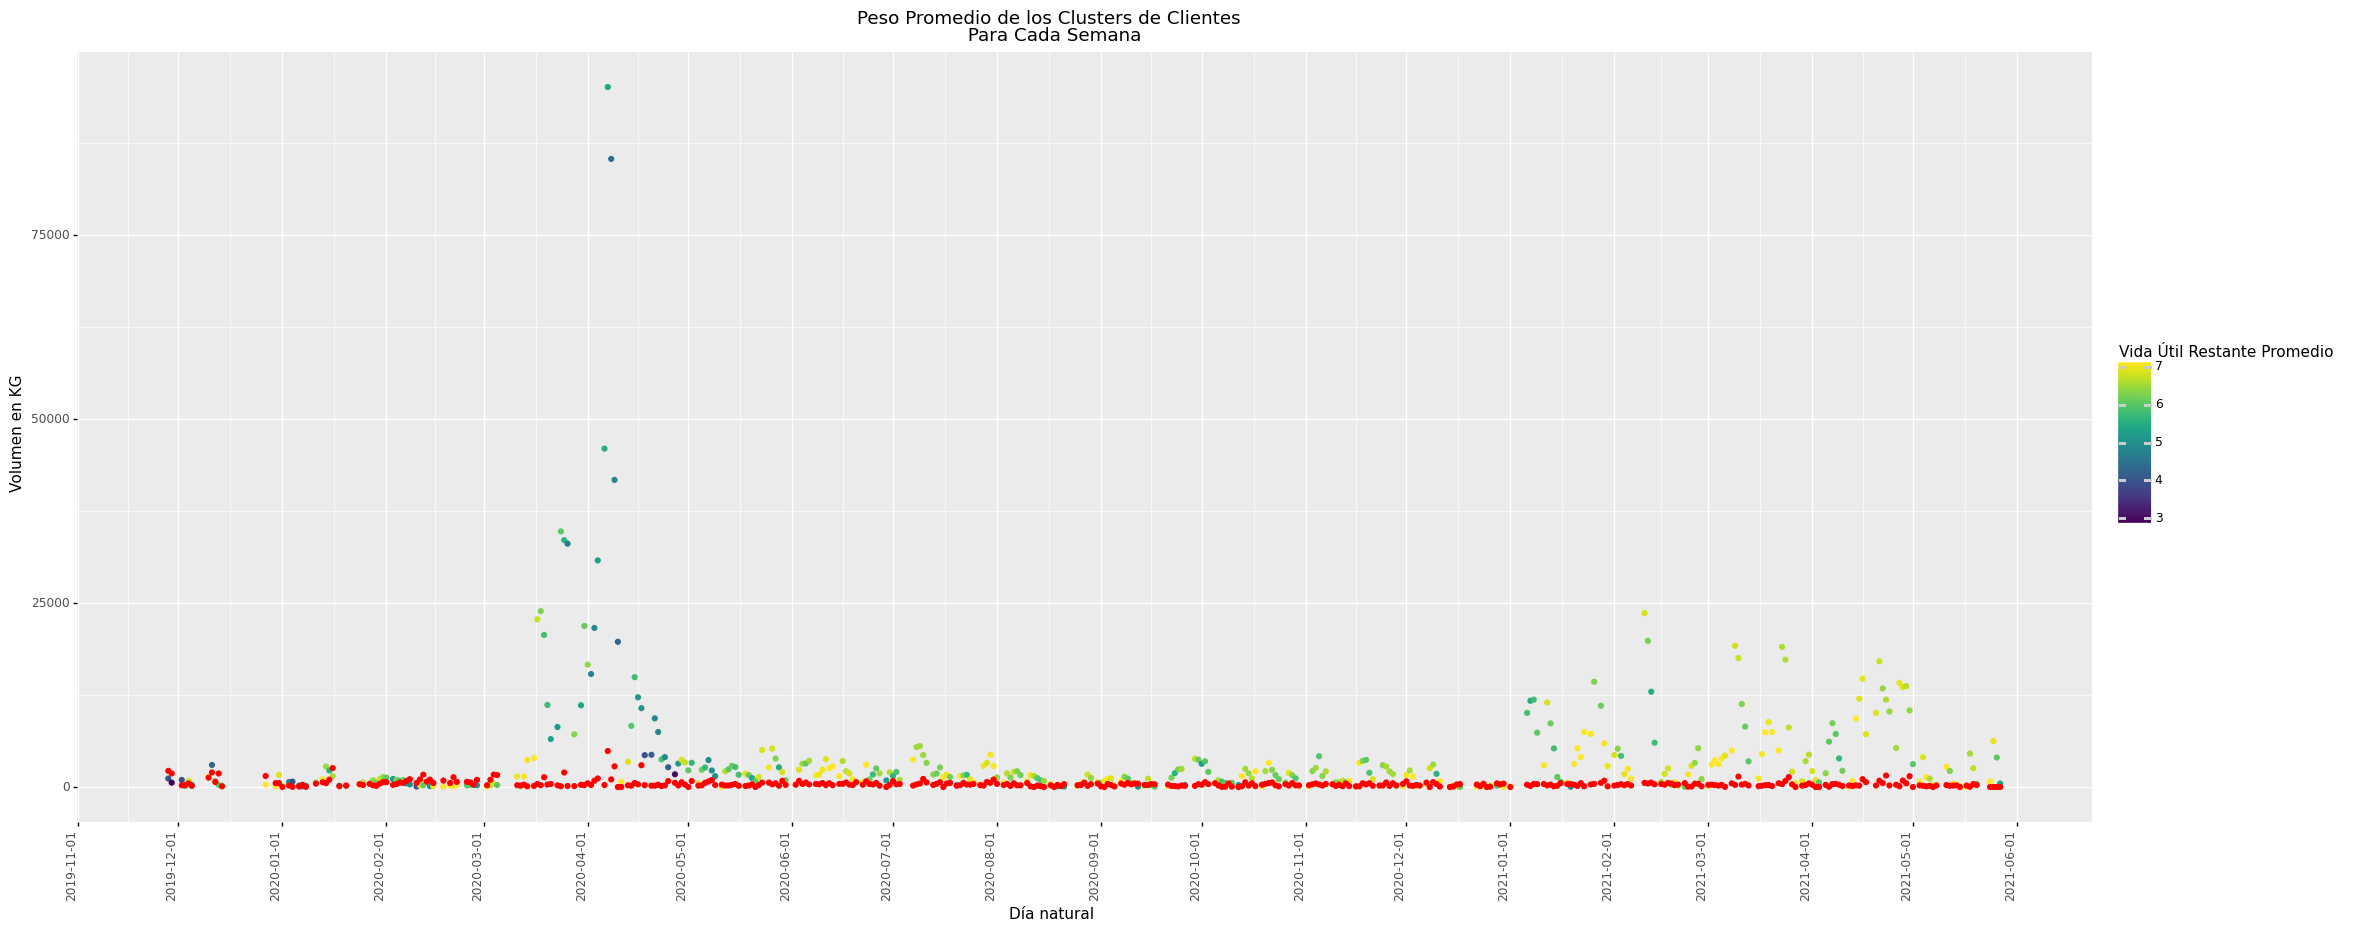

<ggplot: (160055497397)>

In [63]:
dx=DF_VS[DF_VS['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(x='Día natural',
                               y= 'Stock'))\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ))\
                 + geom_point(aes(x='Día natural',
                               y= 'Kilos Venta KG'),color='red')\
                +ggtitle(('Peso Promedio de los Clusters de Clientes'+
                          ' \n Para Cada Semana'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

In [64]:
dx.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,4.00000,1154.0
1,2019-11-29,1843.0,3.00000,592.3
2,2019-12-02,233.0,4.00000,958.4
3,2019-12-03,254.0,6.00000,146.6
4,2019-12-04,483.0,6.79517,824.1


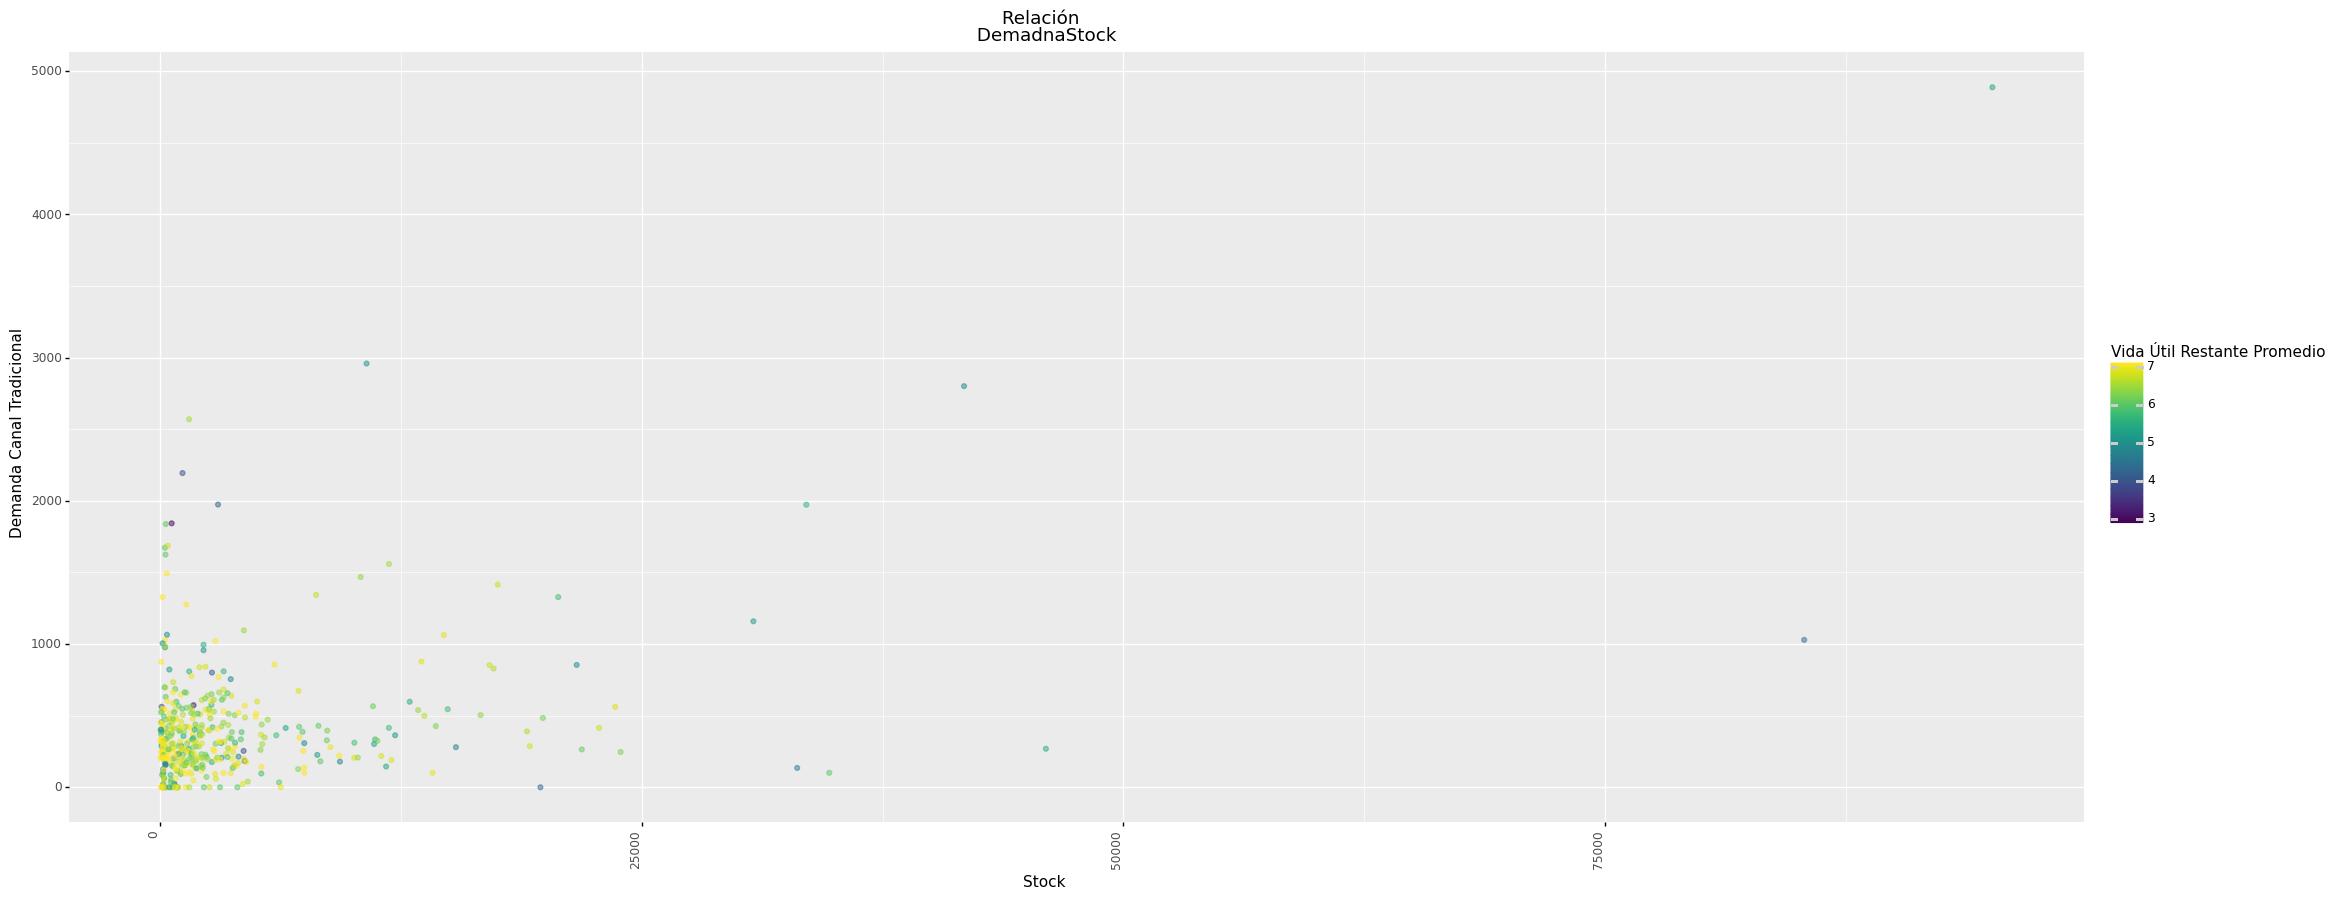

<ggplot: (160055911629)>

In [65]:
dx=DF_VS[DF_VS['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Kilos Venta KG',
                               x= 'Stock'))\
                + labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n DemadnaStock'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

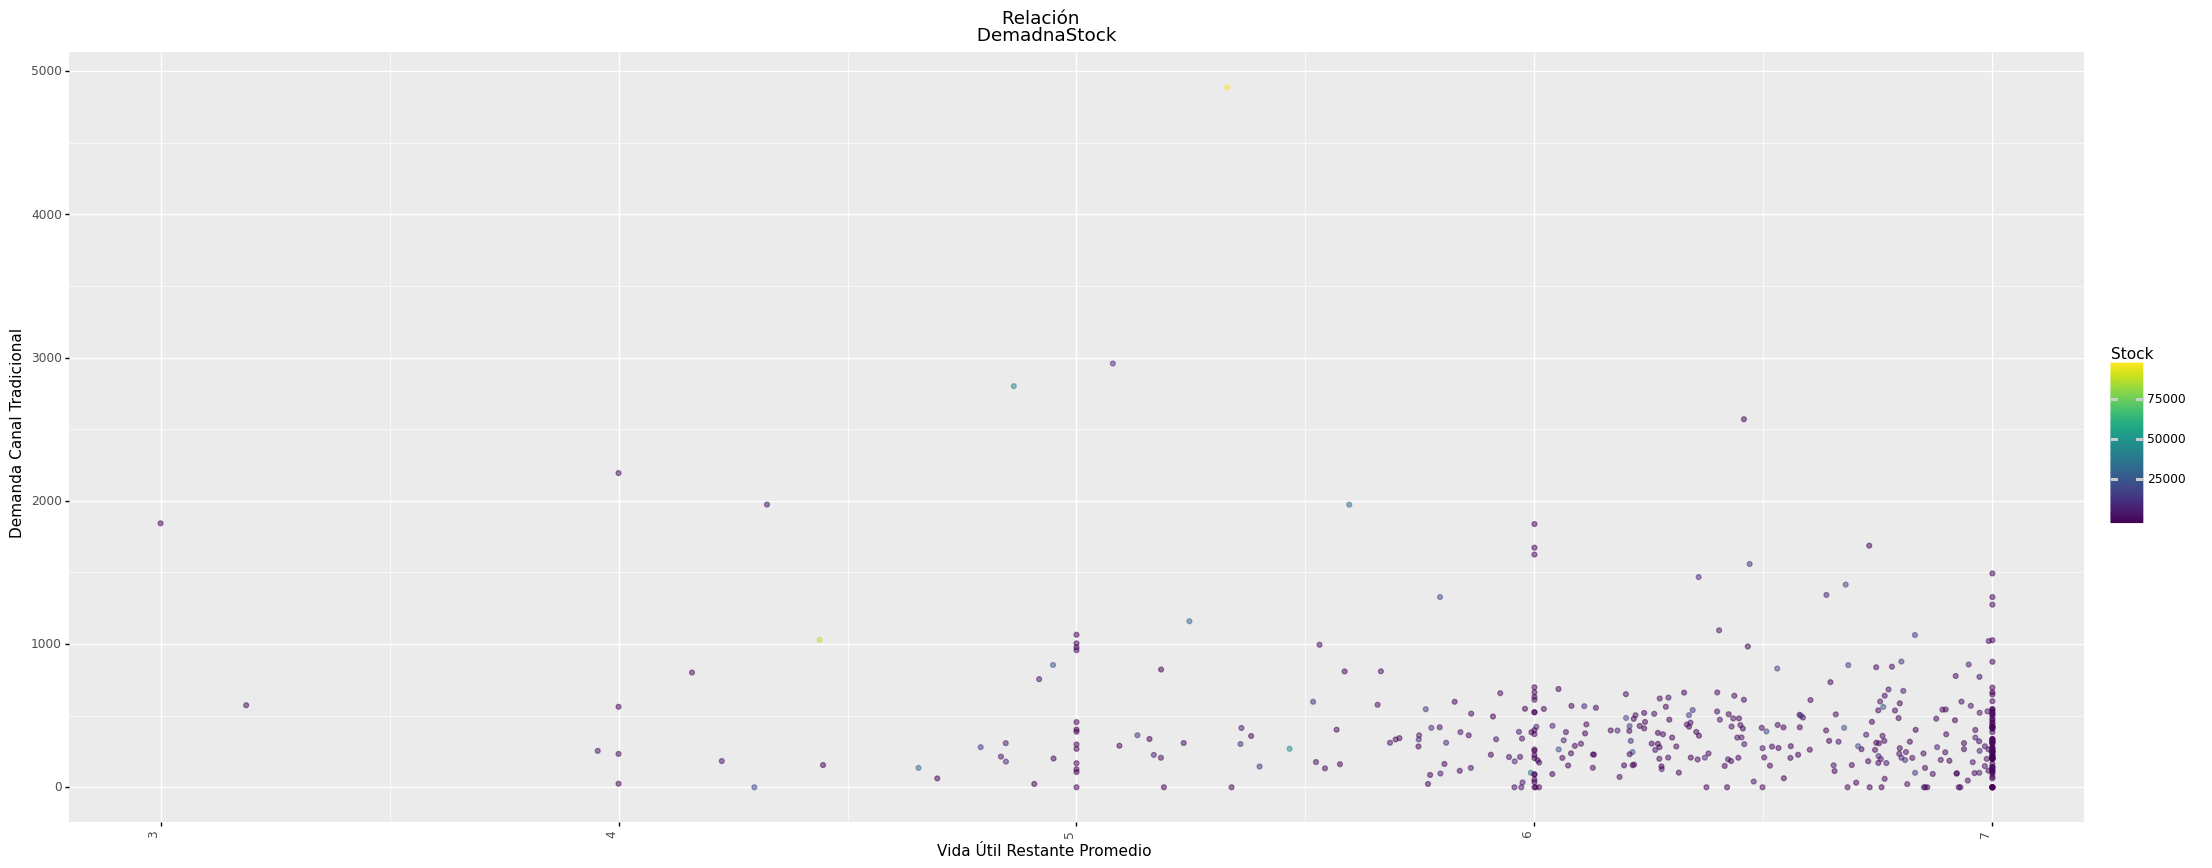

<ggplot: (160055008895)>

In [66]:
dx=DF_VS[DF_VS['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Kilos Venta KG',
                               x= 'Vida Útil Restante Promedio'))\
                + labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Stock'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n DemadnaStock'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

## Caclualo Abastecimiento

\begin{equation}
Abastecimiento_n = Stock_{n+1}+Demanda_n-Stock_n  
\end{equation}



\begin{equation}
Stock_{n+1}=Abastecimiento_n +Stock_n -Demanda_n  
\end{equation}

In [67]:
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2019-11-28,2194.0,4.00000,1154.0
1,2019-11-29,1843.0,3.00000,592.3
2,2019-12-02,233.0,4.00000,958.4
3,2019-12-03,254.0,6.00000,146.6
4,2019-12-04,483.0,6.79517,824.1


In [68]:
Lista_temp=DF_VS.Stock.to_list()[1:]
Lista_temp.append(0)
Lista_temp[:4]

[592.3, 958.4, 146.6, 824.1000000000001]

In [69]:
DF_VS['Stock+1']=Lista_temp
DF_VS.tail()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock,Stock+1
408,2021-05-20,264.0,6.000000,430.5,760.2
409,2021-05-24,0.0,7.000000,760.2,6254.3
410,2021-05-25,0.0,6.853333,6254.3,4005.0
411,2021-05-26,0.0,5.971236,4005.0,471.3
412,2021-05-27,0.0,5.338638,471.3,0.0


In [70]:
DF_VS['Abastecimiento']=DF_VS['Stock+1']+DF_VS['Kilos Venta KG']-DF_VS['Stock']
DF_VS.tail()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento
408,2021-05-20,264.0,6.000000,430.5,760.2,593.7
409,2021-05-24,0.0,7.000000,760.2,6254.3,5494.1
410,2021-05-25,0.0,6.853333,6254.3,4005.0,-2249.3
411,2021-05-26,0.0,5.971236,4005.0,471.3,-3533.7
412,2021-05-27,0.0,5.338638,471.3,0.0,-471.3


### Restando un dia 

```python
def caculo_Aba(Abastecimiento,Stock,Volumen):
    x['Abastecimiento']=x['Stock']-x['Volumen en KG']
    return x

def Abastecimiento_df(data):
    df=data.copy()
    df_futuro=data.copy()
    df_futuro['Día natural']=df_futuro['Día natural']-datetime.timedelta(days=1)
    df_futuro=df_futuro.rename(columns={'Stock':'Stock+1'})
    df=pd.merge(df_futuro[['Día natural','Stock+1']] , df
     , how='right')
    
    a=df.iloc[0:4]
    
    #a.apply(caculo_Aba,)
    return(a)
Abastecimiento_df(DF_VS)
``` 

```python
def caculo_Aba(Stock,Volumen):
    Abastecimiento=Stock+Volumen
    return Abastecimiento

def Abastecimiento_df(data):
    df=data.copy()
    a=df.iloc[0:4]
    
    a['Abastecimiento']=a.apply( lambda x: caculo_Aba(
        x['Stock'],x['Kilos Venta KG']),
           axis = 1)
    return(a)
Abastecimiento_df(DF_VS)

```

## Comportamiento abastecimiento 

### Graficos de Abastecimiento 

In [71]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [72]:
DF_VS['Kilos Venta KG'].isnull().sum()

0

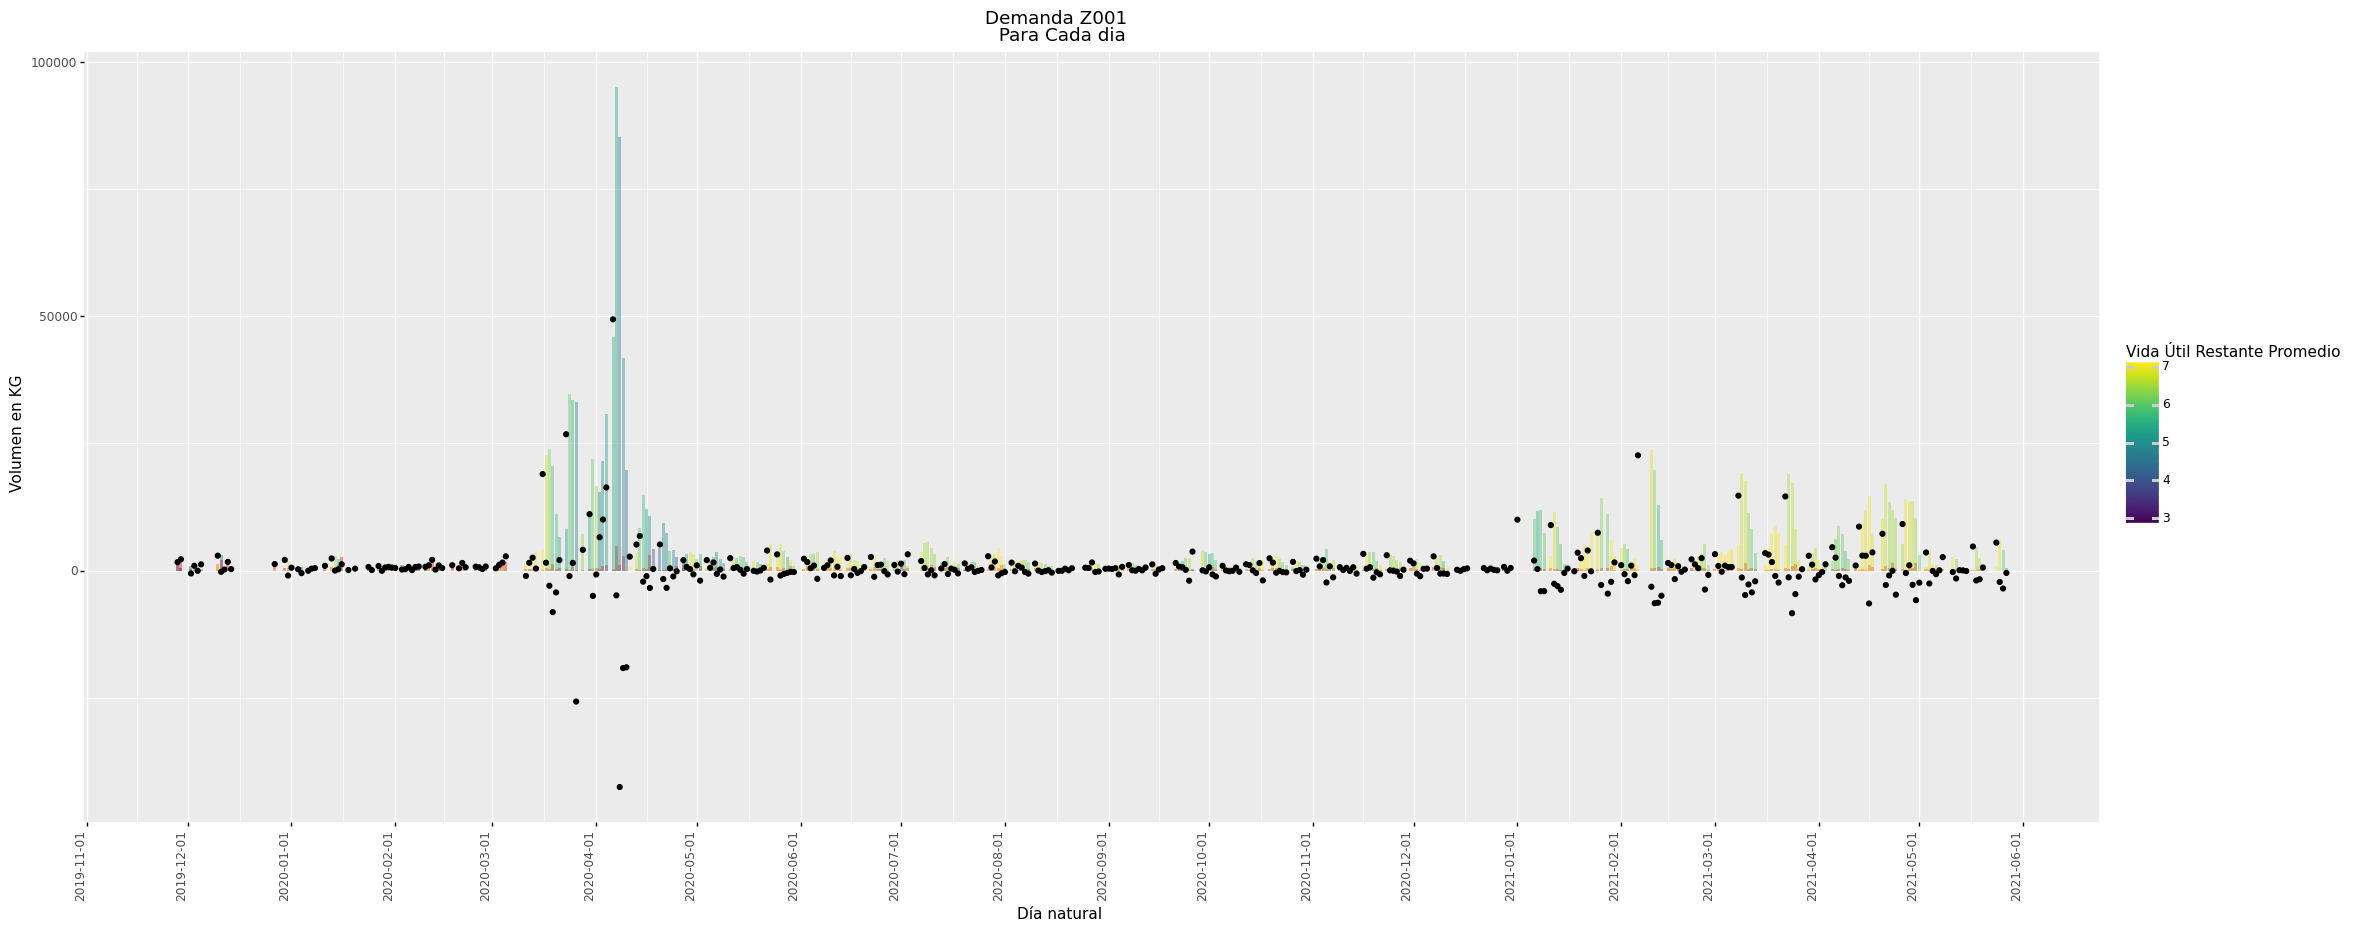

<ggplot: (160055969735)>

In [73]:
Abastec=(
    ggplot(DF_VS, aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=0.4)\
                + geom_col(aes(x='Día natural',y= 'Stock',fill='Vida Útil Restante Promedio'
                     ),alpha=0.4)\
                + geom_point(aes(x='Día natural',y= 'Abastecimiento'),color='black')\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Abastec

<ipython-input-74-3689d590f42d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


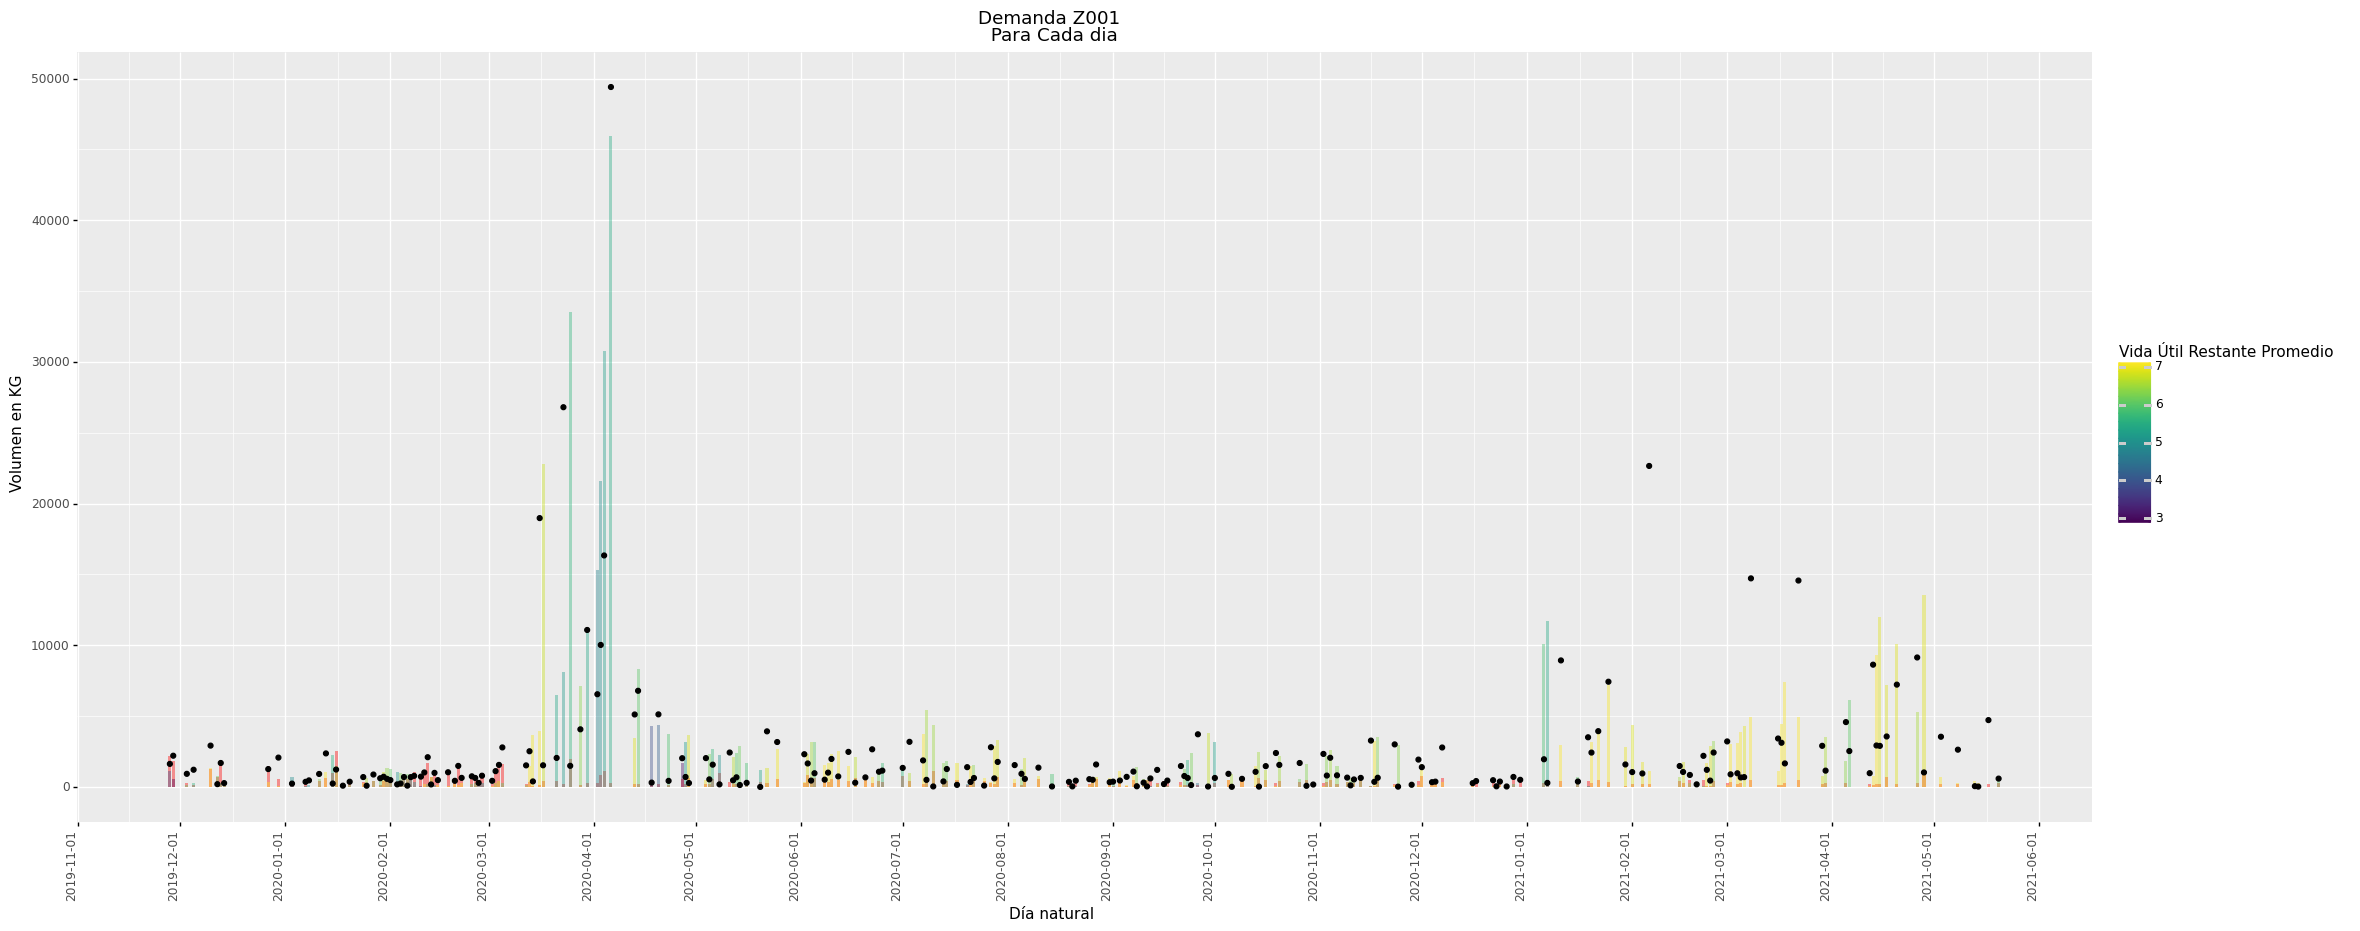

<ggplot: (160056020679)>

In [74]:
Abastec=(
    ggplot(DF_VS[DF_VS.Abastecimiento>=0 ][DF_VS['Kilos Venta KG']>0], aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=0.4)\
                + geom_col(aes(x='Día natural',y= 'Stock',fill='Vida Útil Restante Promedio'
                     ),alpha=0.4)\
                + geom_point(aes(x='Día natural',y= 'Abastecimiento'),color='black')\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Abastec

### Precio promedio
Kilos Venta KG= sum(Kilos Venta KG)

Venta Neta CLP	= la suma de los ingresos

\begin{equation}
Precio_{ponderado} [{\dfrac{CLP}{KG}}]= \dfrac{Ingresos_{totales}[CLP]}{Volumen de ventas[KG]}
\end{equation}

In [75]:
def P_podn(data):
    df=data.groupby('Día natural').sum().reset_index()#[['Día natural', 'Kilos Venta KG']]
    df['Precio Ponderado']=df['Venta Neta']/df['Kilos Venta KG']
    #df['Día natural']=df['Día natural']-datetime.timedelta(days=1)
    return df[['Día natural','Kilos Venta KG','Precio Ponderado']]
P_podn(Data_totales).tail()

,Día natural,Kilos Venta KG,Precio Ponderado
1276,2021-05-17,201,5325.671642
1277,2021-05-18,40,5324.275000
1278,2021-05-19,397,5142.544081
1279,2021-05-20,264,4747.507576
1280,2021-05-22,103,5497.330097


In [76]:
 P_podn(Data_totales).head()

,Día natural,Kilos Venta KG,Precio Ponderado
0,2017-01-03,53,3087.396226
1,2017-01-04,276,3349.873188
2,2017-01-05,195,3259.928205
3,2017-01-06,357,3599.044818
4,2017-01-07,138,3382.811594


In [77]:
#=====================================
# Merge
#=====================================
DF_VS2=pd.merge( P_podn(Data_totales)  ,DF_VS
     , how='left')#'right')
DF_VS2.head()

,Día natural,Kilos Venta KG,Precio Ponderado,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento
0,2017-01-03,53,3087.396226,NaN,NaN,NaN,NaN
1,2017-01-04,276,3349.873188,NaN,NaN,NaN,NaN
2,2017-01-05,195,3259.928205,NaN,NaN,NaN,NaN
3,2017-01-06,357,3599.044818,NaN,NaN,NaN,NaN
4,2017-01-07,138,3382.811594,NaN,NaN,NaN,NaN


In [78]:
DF_VS2['Precio Ponderado'].mean()

3304.5548369555163

<ipython-input-79-f45e95aede1d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


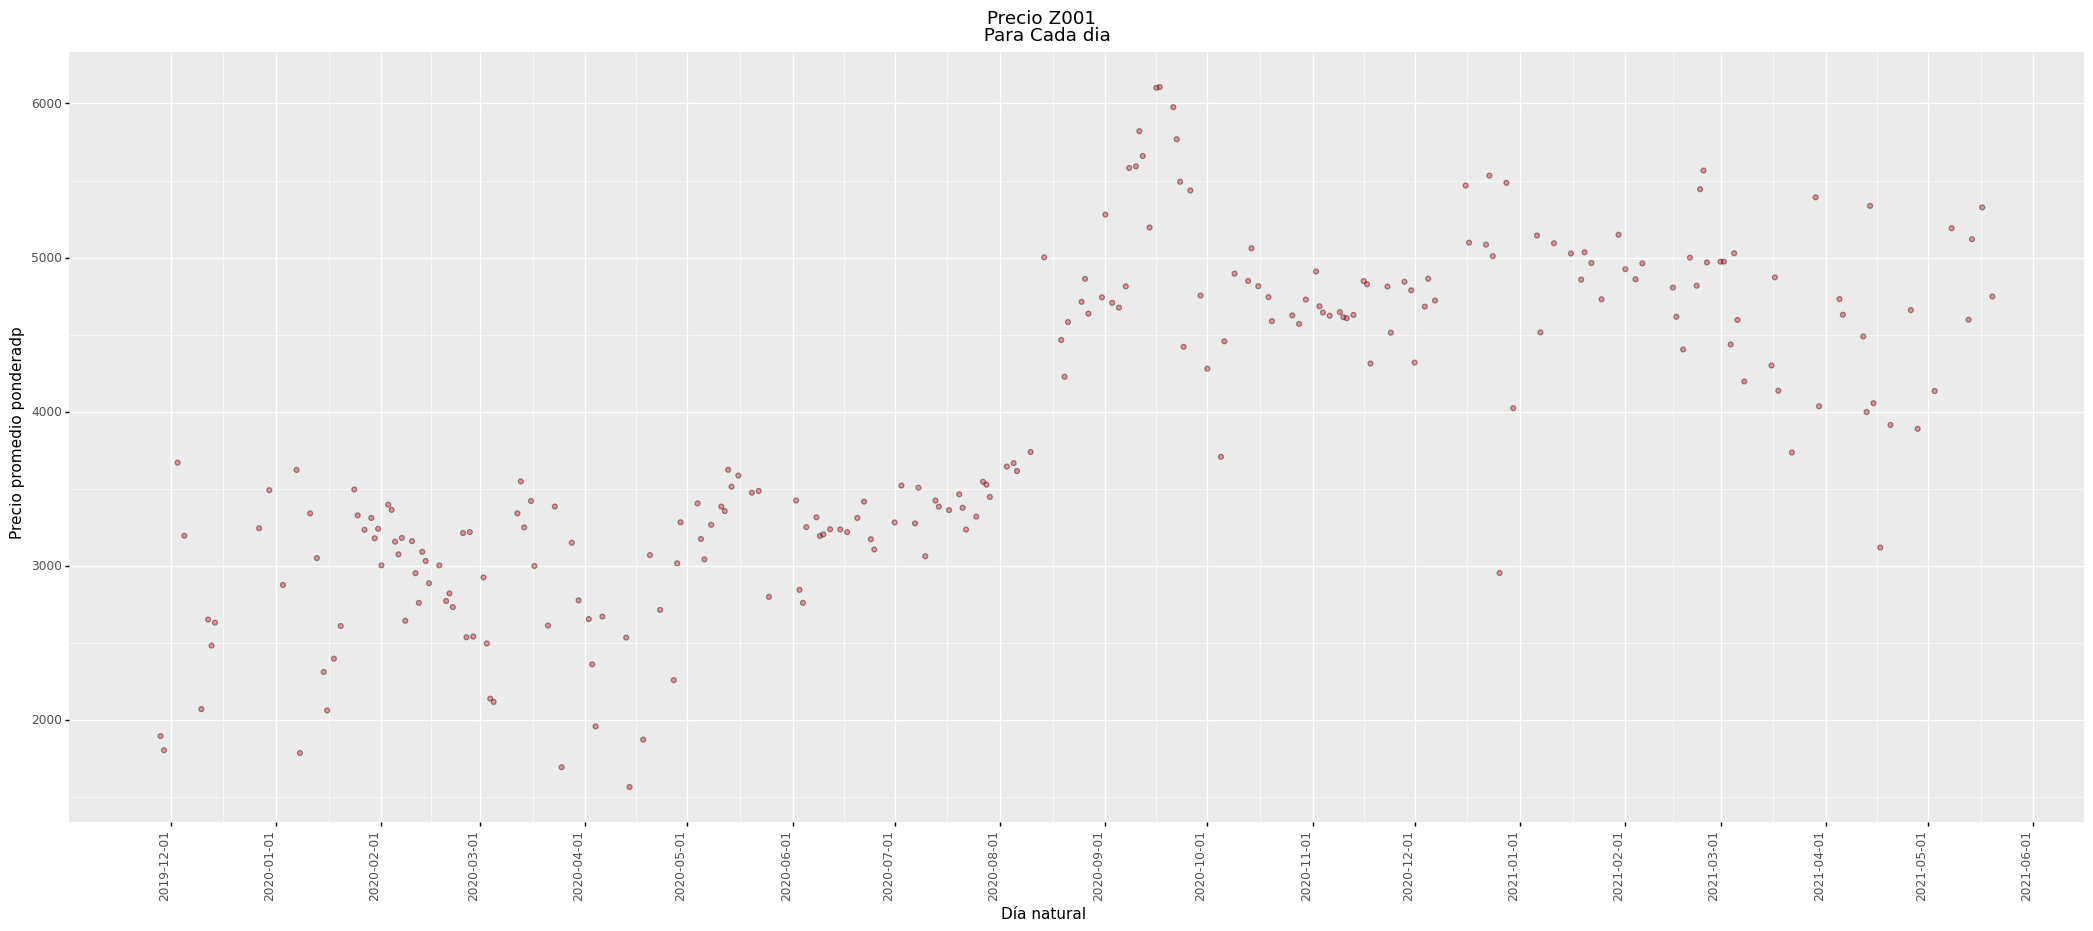

<ggplot: (160055672637)>

In [79]:
Abastec=(
    ggplot(DF_VS2[DF_VS2.Abastecimiento>=0 ][DF_VS2['Kilos Venta KG']>0],
           aes(x='Día natural',y='Precio Ponderado'))                 
                + geom_point(fill='red',alpha=0.4)\
                + labs(y='Precio promedio ponderadp',x='Día natural',size=14)\
                +ggtitle(('Precio Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Abastec

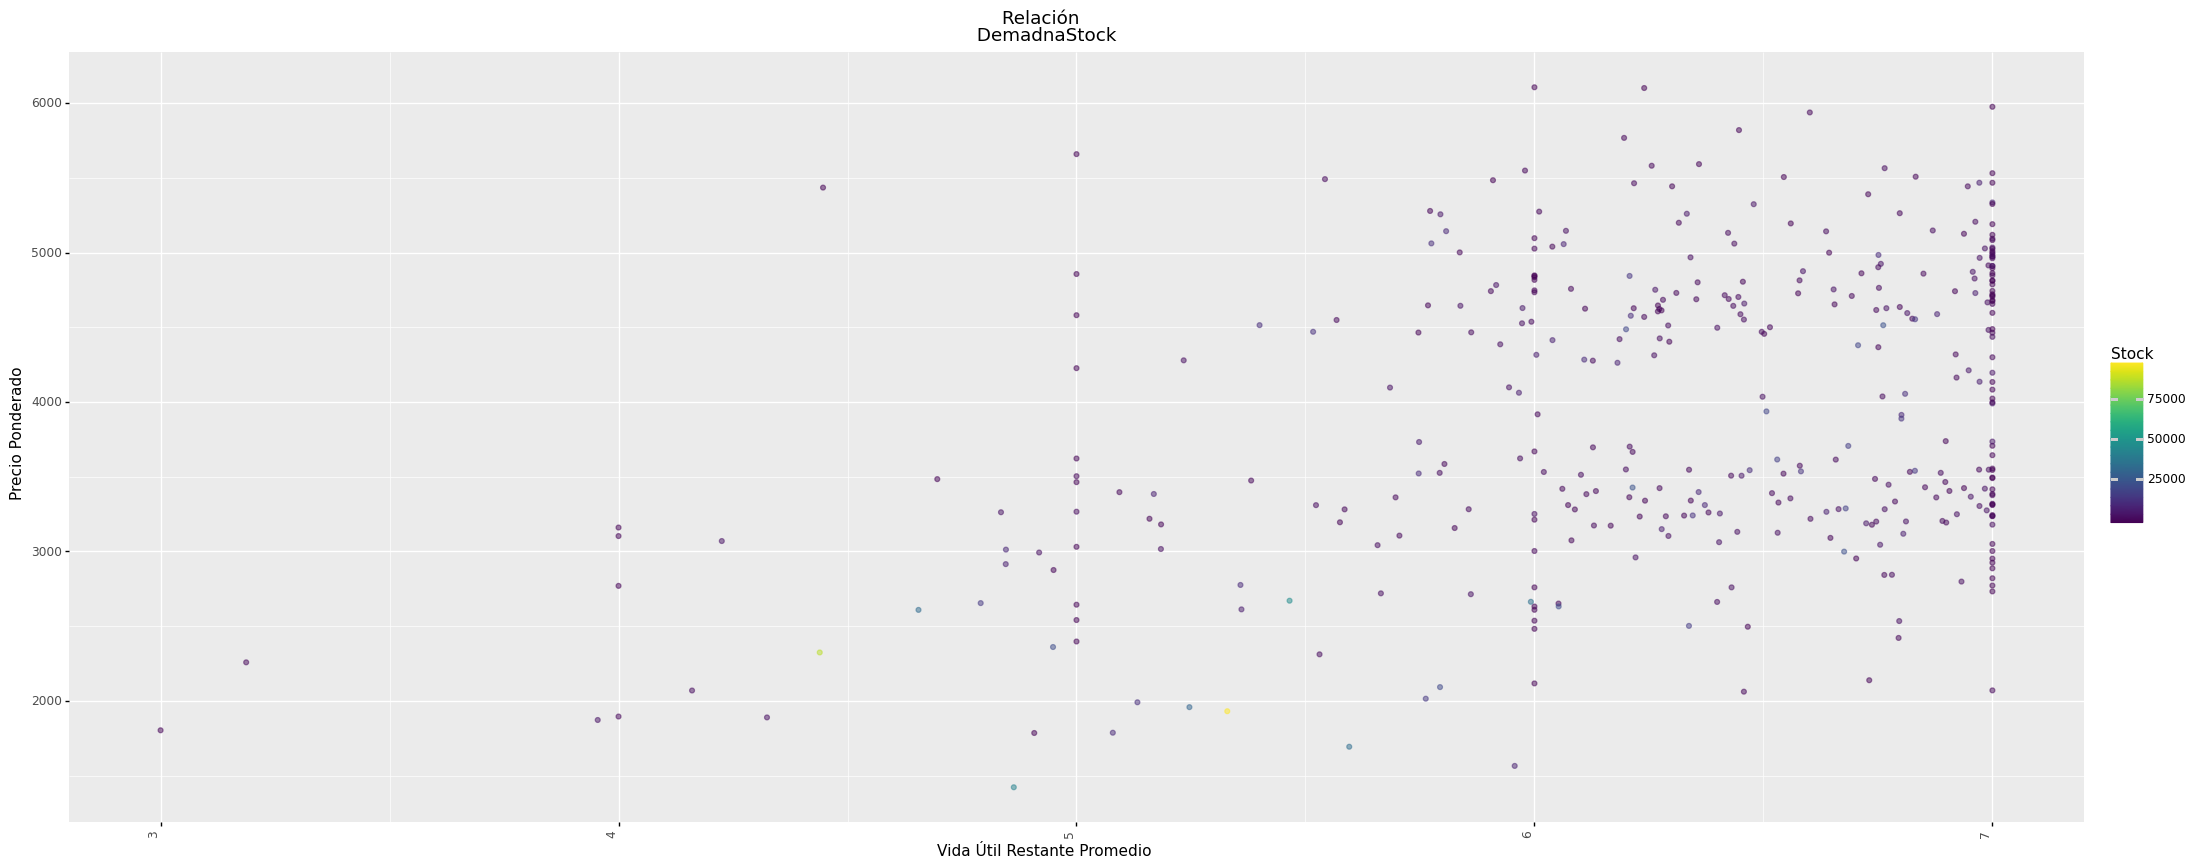

<ggplot: (160055550967)>

In [80]:
dx=DF_VS2[DF_VS2['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Precio Ponderado',
                               x= 'Vida Útil Restante Promedio'))\
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Stock'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n DemadnaStock'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

In [81]:
DF_VS2.columns

Index(['Día natural', 'Kilos Venta KG', 'Precio Ponderado',
       'Vida Útil Restante Promedio', 'Stock', 'Stock+1', 'Abastecimiento'],
      dtype='object')

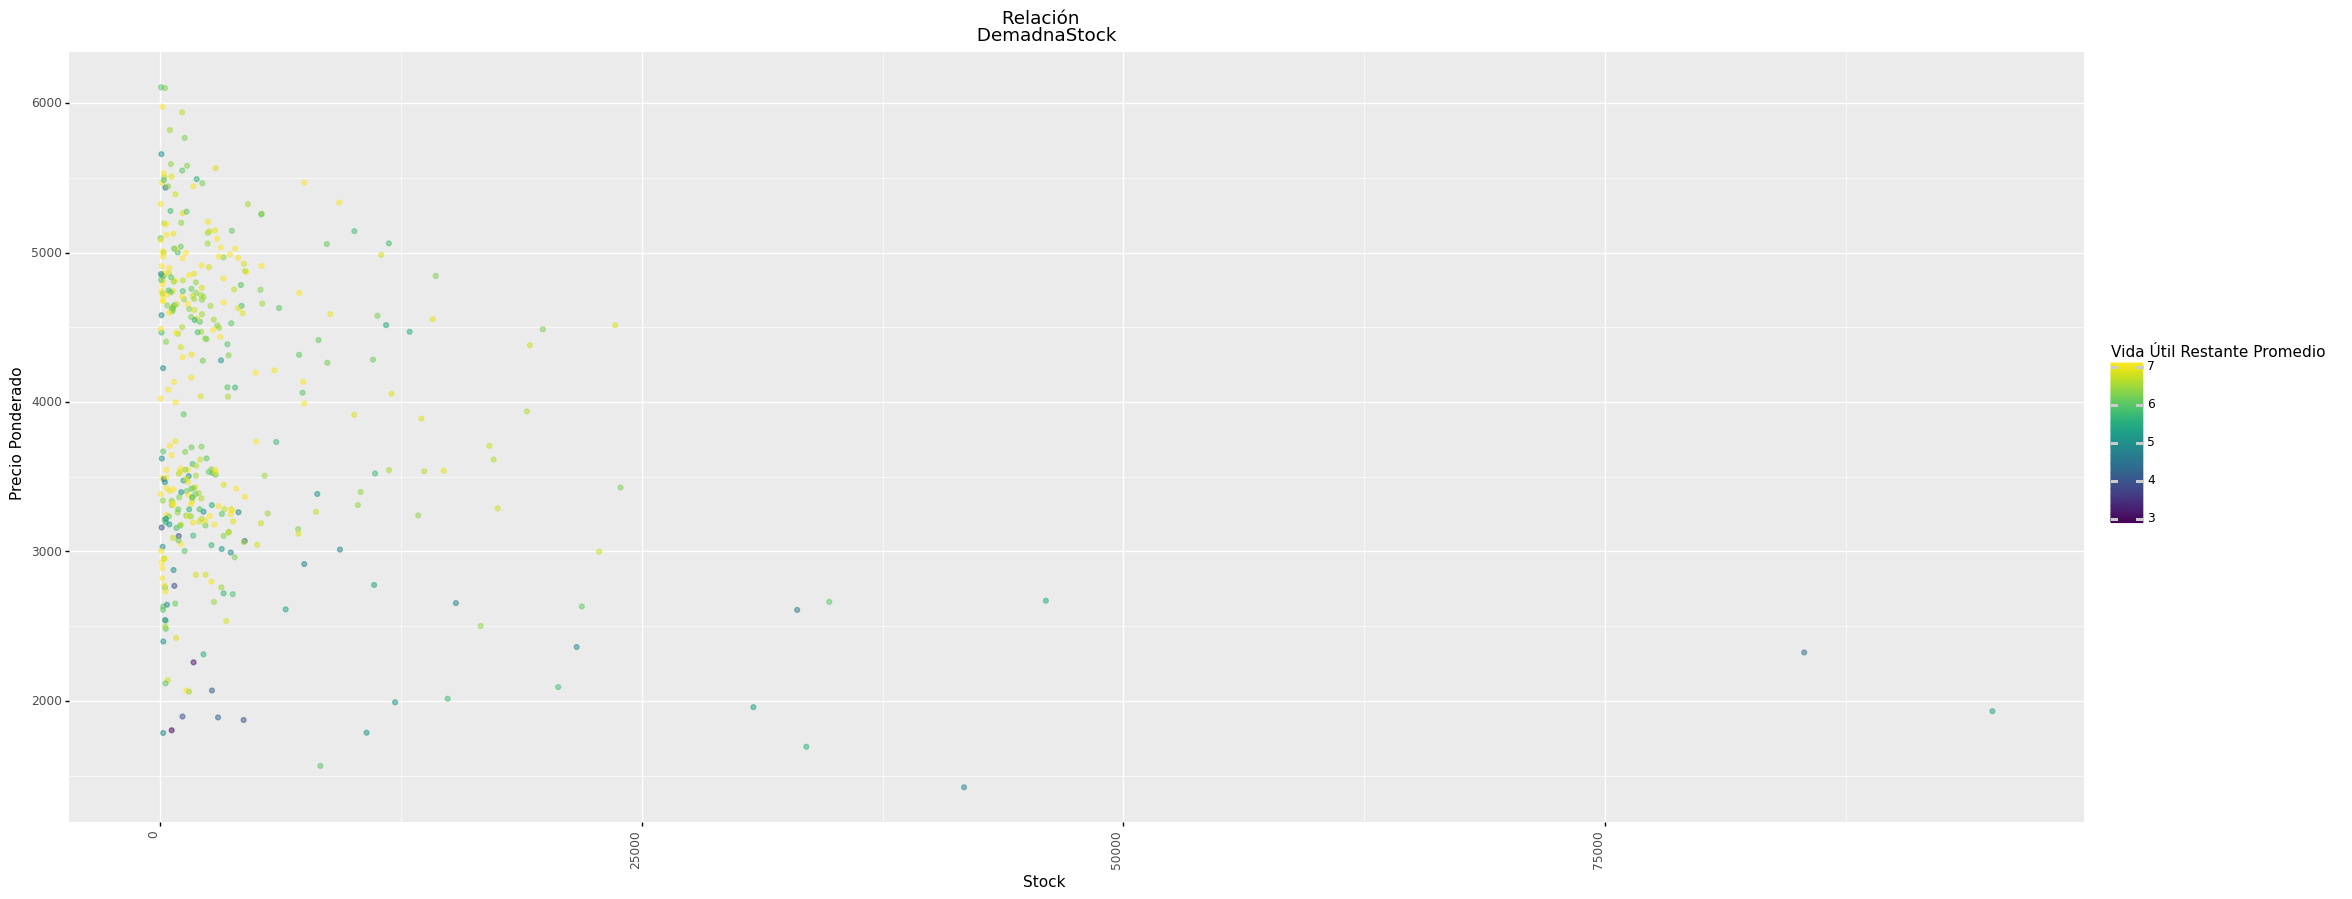

<ggplot: (160056101846)>

In [82]:
dx=DF_VS2[DF_VS2['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Precio Ponderado',
                               x='Stock' ))\
                #+ labs(x='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n DemadnaStock'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

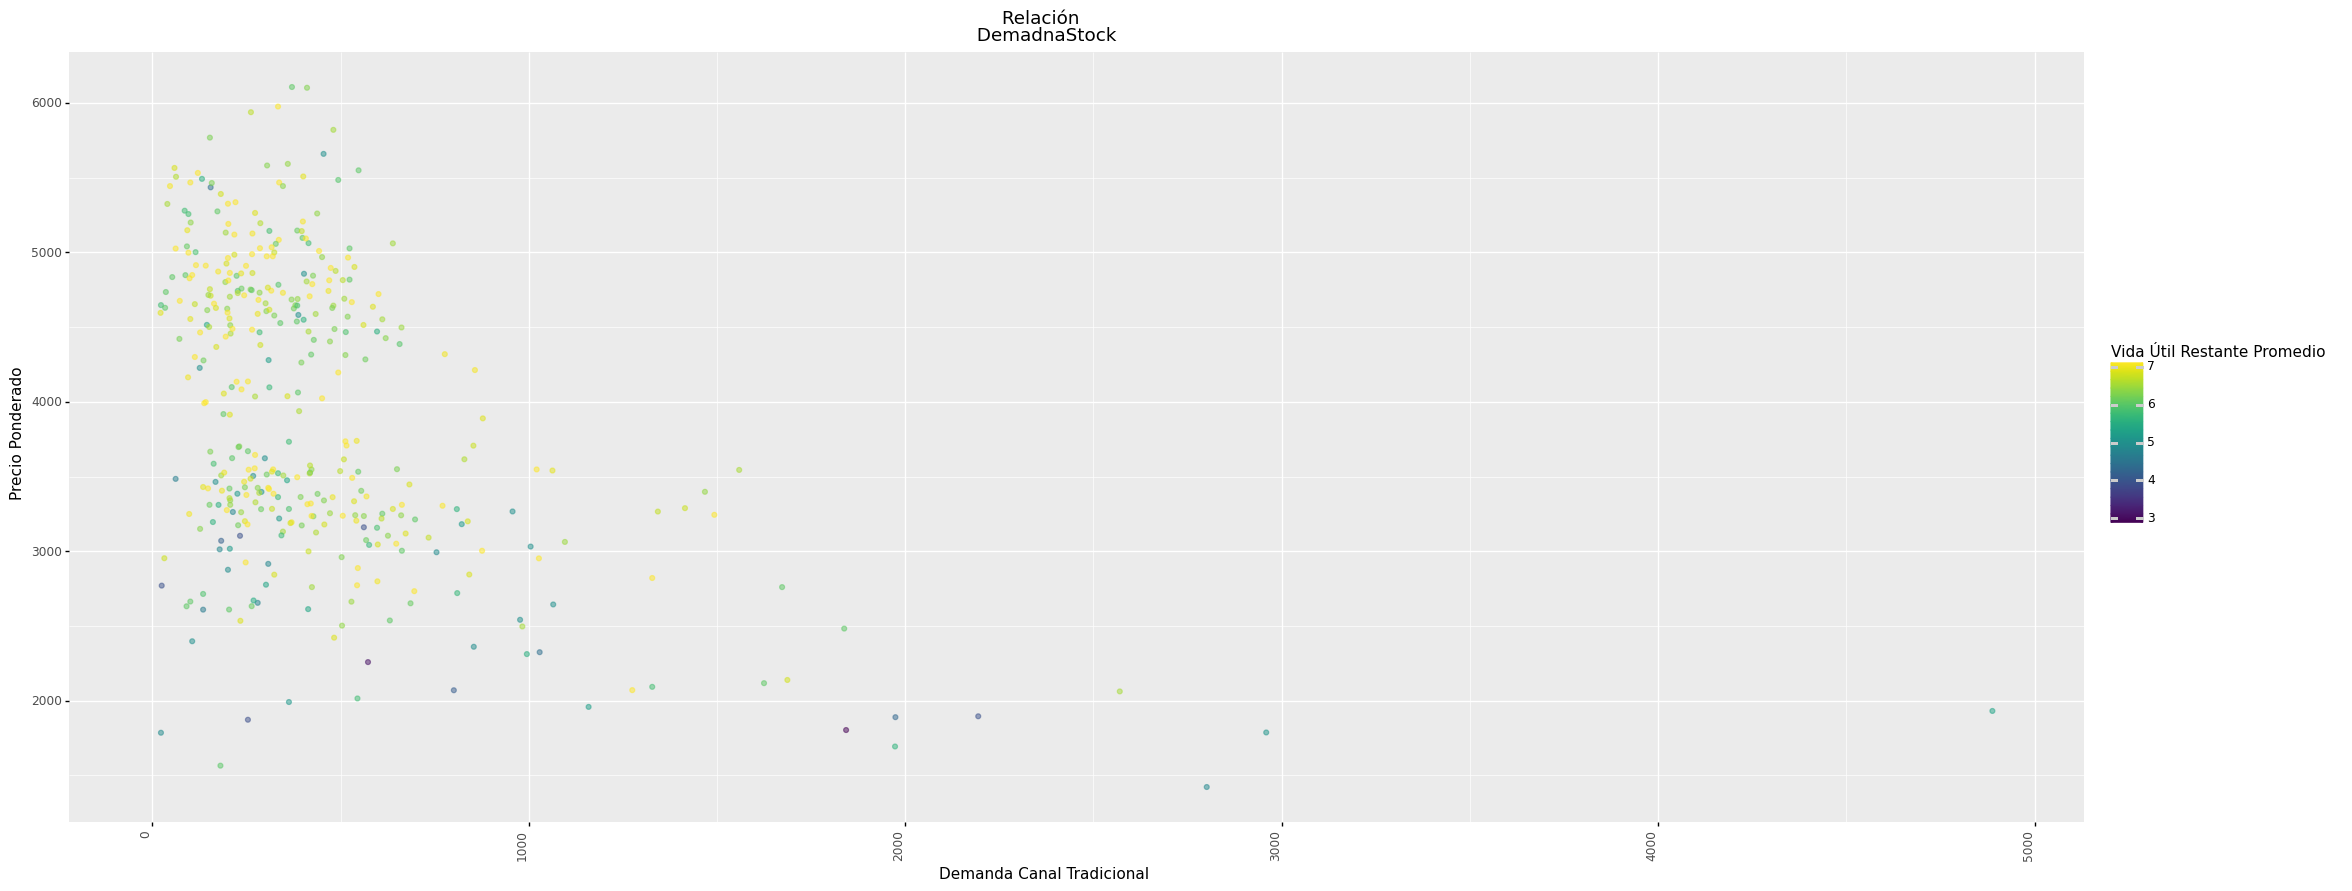

<ggplot: (160055455904)>

In [83]:
dx=DF_VS2[DF_VS2['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Precio Ponderado',
                               x='Kilos Venta KG' ))\
                + labs(x='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n DemadnaStock'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

# Fechas importantes 

## Feriados
Los feriados se pueden tomar en cuenta como:
* Menos horas de trabajo a la semana
* Día que no se ejecuta demanda(Solucionable, sin ajustar el modelos)
* Aumento o disminución de la demanda
* Demanda aumenta

![title](img/Festivos.png)

### Datos 

#### Numeración 

In [55]:
Numeración_Festivos=({1:'año nuevo'
,2:'Semana santa'
,3:'Día Nacional del Trabajo'
,4:'Día de las Glorias Navales'
,5:'San Pedro y San Pablo'
,6:'Día de la Virgen del Carmen'
,7:'Asunción de la Virgen'
,8:'Fiestas patrias(Viernes)'
,9:'Encuentro de Dos Mundos'
,10:'Día de las Iglesias Evangélicas y Protestantes'
,11:'Día de Todos los Santos'
,12:'Inmaculada Concepción'
,13:'Navidad'})
Numeración_Festivos[10]

'Día de las Iglesias Evangélicas y Protestantes'

#### Data Frame de los dias Festivos 2019-2020 

In [56]:
fillN='Dias_Festivos'
col_names=pd.read_csv("Data/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Dias_Festivos = pd.read_csv("Data/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

Dias_Festivos["Día natural"] = Dias_Festivos["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d-%m-%Y').date())
Dias_Festivos.head(1)

,Día natural,Tipo festivo
0,2019-01-01,1


In [57]:
Dias_Festivos[Dias_Festivos["Tipo festivo"]=='1']

,Día natural,Tipo festivo
0,2019-01-01,1
16,2020-01-01,1
31,2021-01-01,1
47,2022-01-01,1


In [58]:
Dias_Festivos.head(1)

,Día natural,Tipo festivo
0,2019-01-01,1


In [59]:
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento
0,2019-11-28,2194.0,1.986698,12990.8,8398.7,-2398.1
1,2019-11-29,1843.0,2.673616,8398.7,324.4,-6231.3
2,2019-11-30,323.0,8.941122,324.4,2738.2,2736.8
3,2019-12-02,233.0,4.347272,2738.2,1626.6,-878.6
4,2019-12-03,254.0,3.695315,1626.6,3618.4,2245.8


## Uso

### Pre

In [60]:
DF_ventas['Día de la semana'].to_list().index('SA')

11

In [61]:
weekday_name_complt={
0:'lunes',1:'martes',2:'miercoles',3:'jueves',4:'viernes',5:'sabado',6:'domingo'
}
weekday_name={
0:'LU',1:'MA',2:'MI',3:'JU',4:'VI',5:'SA',6:'DO'
}

In [62]:
#para encontrar el dia de la semana LU=0 DO=6
weekday_name[datetime.date(2021, 5, 10).weekday()]
#para encontrar el dia de la semana lunes =1 DO=7
datetime.date(2021, 5, 10).isoweekday()

1

In [63]:
# tupla que contiene el Año, semana y dia de la semana LU=1
print(datetime.date(2021, 1, 1).isocalendar()[1])
print(weekday_name[datetime.date(2021, 1, 1).isocalendar()[2]-1])
print(datetime.date(2021, 1, 1).isocalendar())

53
VI
(2020, 53, 5)


In [64]:
#weekday_namer('VI')

In [65]:
print(datetime.date(2019, 12, 31).isocalendar()[1])
print(datetime.date(2019, 12, 31).isocalendar())

1
(2020, 1, 2)


Listado con los rango de semanas

In [66]:
datetime.date(2021, 5, 10)-datetime.date(2021, 5, 9)

datetime.timedelta(days=1)

In [67]:
datetime.date(2019, 12, 28).isoweekday()

6

In [68]:
weekday_name[datetime.date(2019, 11, 30).weekday()]

'SA'

In [69]:
DF_VS

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento
0,2019-11-28,2194.0,1.986698,12990.8,8398.7,-2398.1
1,2019-11-29,1843.0,2.673616,8398.7,324.4,-6231.3
2,2019-11-30,323.0,8.941122,324.4,2738.2,2736.8
3,2019-12-02,233.0,4.347272,2738.2,1626.6,-878.6
4,2019-12-03,254.0,3.695315,1626.6,3618.4,2245.8
...,...,...,...,...,...,...
445,2021-05-22,103.0,9.228872,8693.5,5766.3,-2824.2
446,2021-05-24,0.0,8.318107,5766.3,6254.3,488.0
447,2021-05-25,0.0,6.853333,6254.3,4005.0,-2249.3
448,2021-05-26,0.0,5.971236,4005.0,869.2,-3135.8


### Aplication Cluster Frecuente

In [70]:
DF_Frecuent=DF_ventas[
    DF_ventas['identified_clusters']==4
                     ].groupby('Día natural').sum().reset_index()[[
    'Día natural','Kilos Venta KG',
       'Venta Neta CLP', 'Precio Promedio CLP'
]]#[['Día natural','Kilos Venta KG']]
DF_Frecuent['Precio Promedio CLP']=DF_Frecuent['Venta Neta CLP']/DF_Frecuent['Kilos Venta KG']
DF_Frecuent.head()

,Día natural,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
0,2017-02-21,14,52248,3732.000000
1,2017-03-14,13,39641,3049.307692
2,2017-03-28,35,74508,2128.800000
3,2017-03-30,49,113045,2307.040816
4,2017-04-08,23,84242,3662.695652


In [71]:
#print(datetime.date(2021, 1, 1).isocalendar()[1])
DF_Frecuent['Semana']=DF_Frecuent['Día natural'].apply(lambda x: x.isocalendar()[1])
DF_Frecuent['Año']=DF_Frecuent['Día natural'].apply(lambda x: x.isocalendar()[0])
DF_Frecuent.head()

,Día natural,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
0,2017-02-21,14,52248,3732.000000,8,2017
1,2017-03-14,13,39641,3049.307692,11,2017
2,2017-03-28,35,74508,2128.800000,13,2017
3,2017-03-30,49,113045,2307.040816,13,2017
4,2017-04-08,23,84242,3662.695652,14,2017


In [72]:
#Dias_Festivos
Dias_Festivos['Semana']=Dias_Festivos['Día natural'].apply(lambda x: x.isocalendar()[1])
Dias_Festivos['Año']=Dias_Festivos['Día natural'].apply(lambda x: x.isocalendar()[0])
Dias_Festivos.head()

,Día natural,Tipo festivo,Semana,Año
0,2019-01-01,1,1,2019
1,2019-04-19,2,16,2019
2,2019-04-20,2,16,2019
3,2019-05-01,3,18,2019
4,2019-05-21,4,21,2019


In [73]:
DF_Fest=pd.merge(Dias_Festivos[['Semana','Año','Tipo festivo']],
                 DF_Frecuent
                 , how='right')

DF_Fest.sort_values(by=['Día natural'], inplace=True)
DF_Fest['Tipo festivo']=DF_Fest['Tipo festivo'].fillna(0)
DF_Fest[DF_Fest.Año==2019].head(20)

,Semana,Año,Tipo festivo,Día natural,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
51,3,2019,0,2019-01-18,401,401060,1000.149626
52,6,2019,0,2019-02-07,33,59310,1797.272727
53,6,2019,0,2019-02-09,168,285192,1697.571429
54,13,2019,0,2019-03-27,15,20111,1340.733333
55,21,2019,4,2019-05-23,49,131652,2686.775510
56,21,2019,4,2019-05-24,25,66040,2641.600000
57,21,2019,4,2019-05-25,16,42354,2647.125000
58,22,2019,0,2019-06-01,1094,2624328,2398.837294
59,25,2019,0,2019-06-20,29,53317,1838.517241
60,25,2019,0,2019-06-21,105,115841,1103.247619


## Formato 1 Col x festividad 

In [74]:
Numeración_Festivos

{1: 'año nuevo',
 2: 'Semana santa',
 3: 'Día Nacional del Trabajo',
 4: 'Día de las Glorias Navales',
 5: 'San Pedro y San Pablo',
 6: 'Día de la Virgen del Carmen',
 7: 'Asunción de la Virgen',
 8: 'Fiestas patrias(Viernes)',
 9: 'Encuentro de Dos Mundos',
 10: 'Día de las Iglesias Evangélicas y Protestantes',
 11: 'Día de Todos los Santos',
 12: 'Inmaculada Concepción',
 13: 'Navidad'}

In [75]:
i=0
### primera iteraci+on

DF_temp=pd.DataFrame(columns=['Año', 'Semana',Numeración_Festivos[int(Dias_Festivos.iloc[i,1])]])

i=0
Semana_anterior=(Dias_Festivos.iloc[i,0]- datetime.timedelta(days=7))
Semana_Posterior=(Dias_Festivos.iloc[i,0]+ datetime.timedelta(days=7))

#semana
print(Semana_anterior.isocalendar()[1],'//'
      ,Dias_Festivos.iloc[i,0].isocalendar()[1],'//'
      ,Semana_Posterior.isocalendar()[1])
#Año
print(Semana_anterior.isocalendar()[0],'//'
      ,Dias_Festivos.iloc[i,0].isocalendar()[0],'//'
      ,Semana_Posterior.isocalendar()[0])

52 // 1 // 2
2018 // 2019 // 2019


### creación del DF 

In [76]:
#for i in range(Dias_Festivos.shape[0]):

#DF_temp=pd.DataFrame(columns=['Año', 'Semana',Numeración_Festivos[int(Dias_Festivos.iloc[i,1])]])

i=0
Semana_anterior=(Dias_Festivos.iloc[i,0]- datetime.timedelta(days=7))
Semana_Posterior=(Dias_Festivos.iloc[i,0]+ datetime.timedelta(days=7))

semana=[Semana_anterior.isocalendar()[1]
      ,Dias_Festivos.iloc[i,0].isocalendar()[1]
      ,Semana_Posterior.isocalendar()[1]]
#Año
año=[Semana_anterior.isocalendar()[0]
      ,Dias_Festivos.iloc[i,0].isocalendar()[0]
      ,Semana_Posterior.isocalendar()[0]]
num=[1,2,3]


DF_temp=pd.DataFrame({'Año':año, 'Semana':semana,(
              Numeración_Festivos[int(Dias_Festivos.iloc[i,1])]
                #+' '+ str(Dias_Festivos.iloc[i,0].isocalendar()[0])
                ):num
                     })
DF_temp


,Año,Semana,año nuevo
0,2018,52,1
1,2019,1,2
2,2019,2,3


### iteración con cada fecha

In [77]:


#DF_temp=pd.DataFrame(columns=['Año', 'Semana',Numeración_Festivos[int(Dias_Festivos.iloc[i,1])]])
for i in range(1,Dias_Festivos.shape[0]-1):
    #i=20   
    Semana_anterior=(Dias_Festivos.iloc[i,0]- datetime.timedelta(days=7))
    Semana_Posterior=(Dias_Festivos.iloc[i,0]+ datetime.timedelta(days=7))

    semana=[Semana_anterior.isocalendar()[1]
          ,Dias_Festivos.iloc[i,0].isocalendar()[1]
          ,Semana_Posterior.isocalendar()[1]]
    #Año
    año=[Semana_anterior.isocalendar()[0]
          ,Dias_Festivos.iloc[i,0].isocalendar()[0]
          ,Semana_Posterior.isocalendar()[0]]
    num=[1,2,3]


    DF_temp2=pd.DataFrame({'Año':año, 'Semana':semana,(
                  Numeración_Festivos[int(Dias_Festivos.iloc[i,1])]
                    #+' '+ str(Dias_Festivos.iloc[i,0].isocalendar()[0])
                    ):num
                         })
    DF_temp=pd.concat([DF_temp, DF_temp2])
    
    
for i in range(2,15):
    DF_temp.iloc[:,i]=DF_temp.iloc[:,i].fillna(0)
    
DF_temp.head()

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad
0,2018,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2019,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,16,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
DF_temp.tail()

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad
1,2021,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2021,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
0,2021,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2021,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2021,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [79]:
DF_temp[DF_temp.Año==2019]

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad
1,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2019,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,16,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,17,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2019,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,16,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,17,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2019,17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,18,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ajustar datos repetidos 

In [80]:
temp=DF_temp.copy()
for i in temp.columns:
    temp[i].astype('category')
print('Sin filtro:',temp.shape)
temp=temp.drop_duplicates()#(keep=False,inplace=True)
print('Con filtro:',temp.shape)
#temp[temp.Semana==16]

temp2=temp.groupby(['Año','Semana']).sum().reset_index()
print(temp2.shape)
temp2.head()#[temp2.Semana==43]

Sin filtro: (141, 15)
Con filtro: (117, 15)
(98, 15)


,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad
0,2018,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,16,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge con DF de demanda

Se utiliza temp2 porque no tieien datos repretidos, se sumaron las columnas para que no se sumen los 1 con los 0, en algunos casos.

tomar en cuenta que la 

### Datos de las facturaciones  DF_Frecuent
`DF_ventas` posee los registros de las ventas de la zona pero que calzan con los clusters geenrados, es decir no hay ventas que no hayan realizado clientes  no registrados en el clustering

`data`iene todos los registros

In [81]:
DF_ventas.columns

Index(['Cliente - Local.1', 'identified_clusters', 'Material',
       'Tipo de cliente', 'Zona de ventas', 'Zona de ventas.1',
       'Oficina de Ventas Unifica', 'Oficina de Ventas Unifica.1',
       'Zona de reparto', 'Subtipo de cliente', 'Cluster', 'Cliente - Local',
       'Mes', 'Año natural/Semana', 'Día natural', 'Día de la semana',
       'Kilos Venta KG', 'Venta Neta CLP', 'Precio Promedio CLP', 'Semana',
       'Año'],
      dtype='object')

In [82]:
#[DF_ventas['identified_clusters']==4]
DF_Frecuent=data.groupby(['Día natural','Año','Semana']).sum().reset_index()[[
    'Día natural','Año','Semana','Kilos Venta KG',
       'Venta Neta CLP', 'Precio Promedio CLP'
]]#[['Día natural','Kilos Venta KG']]
DF_Frecuent['Precio Promedio CLP']=DF_Frecuent['Venta Neta CLP']/DF_Frecuent['Kilos Venta KG']
DF_Frecuent[DF_Frecuent.Año==2019].head(14)

,Día natural,Año,Semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
484,2018-12-31,2019,1,29,102785,3544.310345
485,2019-01-03,2019,1,41,144165,3516.219512
486,2019-01-04,2019,1,22,78365,3562.045455
487,2019-01-05,2019,1,22,76195,3463.409091
488,2019-01-07,2019,2,20,68985,3449.250000
489,2019-01-09,2019,2,502,979050,1950.298805
490,2019-01-10,2019,2,68,158800,2335.294118
491,2019-01-11,2019,2,146,296752,2032.547945
492,2019-01-12,2019,2,212,478727,2258.146226
493,2019-01-14,2019,3,19,48100,2531.578947


In [83]:
DF_Frecuent.head()

,Día natural,Año,Semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
0,2017-01-04,2017,1,58,168634,2907.482759
1,2017-01-05,2017,1,30,91506,3050.200000
2,2017-01-06,2017,1,62,193977,3128.661290
3,2017-01-07,2017,1,33,99328,3009.939394
4,2017-01-09,2017,2,16,49487,3092.937500


### Aplicacion del merge 
DF_Frecuent posee la demanda y el precio de promedio ponderado de dicha demanda dia. al utilizar 


In [84]:
DF_Fest=pd.merge(temp2,
                 DF_Frecuent[['Año','Semana','Día natural'
                              ,'Kilos Venta KG','Precio Promedio CLP']]
                 , how='right')

DF_Fest.sort_values(by=['Día natural'], inplace=True)
for i in range(2,15):
    DF_Fest.iloc[:,i]=DF_Fest.iloc[:,i].fillna(0)

tempdf=DF_Fest[DF_Fest.Año>=2019]
tempdf[tempdf.Semana==43]
tempdf.head()

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad,Día natural,Kilos Venta KG,Precio Promedio CLP
484,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,29,3544.310345
485,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-03,41,3516.219512
486,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-04,22,3562.045455
487,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-05,22,3463.409091
488,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-07,20,3449.250000


In [85]:
DF_Fest[DF_Fest['Día natural']>datetime.date(2018, 12,30 )]

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad,Día natural,Kilos Venta KG,Precio Promedio CLP
484,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,29,3544.310345
485,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-03,41,3516.219512
486,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-04,22,3562.045455
487,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-05,22,3463.409091
488,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-07,20,3449.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2021,19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-14,80,4489.125000
1088,2021,20,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-17,61,4946.311475
1089,2021,20,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-18,19,5049.000000
1090,2021,20,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-19,203,4793.349754


In [86]:
DF_Fest[DF_Fest.Año>2018]

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad,Día natural,Kilos Venta KG,Precio Promedio CLP
484,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,29,3544.310345
485,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-03,41,3516.219512
486,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-04,22,3562.045455
487,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-05,22,3463.409091
488,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-07,20,3449.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2021,19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-14,80,4489.125000
1088,2021,20,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-17,61,4946.311475
1089,2021,20,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-18,19,5049.000000
1090,2021,20,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-05-19,203,4793.349754


#### Repetidos? 

In [87]:
DF_Fest.columns

Index(['Año', 'Semana', 'año nuevo', 'Semana santa',
       'Día Nacional del Trabajo', 'Día de las Glorias Navales',
       'San Pedro y San Pablo', 'Día de la Virgen del Carmen',
       'Asunción de la Virgen', 'Fiestas patrias(Viernes)',
       'Encuentro de Dos Mundos',
       'Día de las Iglesias Evangélicas y Protestantes',
       'Día de Todos los Santos', 'Inmaculada Concepción', 'Navidad',
       'Día natural', 'Kilos Venta KG', 'Precio Promedio CLP'],
      dtype='object')

In [88]:
tempc=DF_Fest.groupby( 'Día natural').count().reset_index()#['Año']
tempc[tempc.Año>1]

,Día natural,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),Encuentro de Dos Mundos,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad,Kilos Venta KG,Precio Promedio CLP


## Semanas de pago(Salario) 

#  Formación Data Predicciones

Artificial Neural Network + Prophet Model of Facebook


\begin{equation}
Demanda=
Prophet+E_p
\end{equation}

\begin{equation}
E_p=ANN + E_ANN
\end{equation}


* Falta incorporar el precio como variable
    * Precio del CT
    * Precio de Z001
    * Precio dia anterior
    * Precio o semana anterior

```python

#DF_ventas Posee las ventas de los clientes del CT
DF_ventas 

#DF_VS Posee los niveles de Stok Abastecimiento y Demanda de la Z001
DF_VS

# Dias_Festivos Posee los dias festivos del 2019 al 2020
Dias_Festivos
```

Se juntaran los 3 df para formar 1, para ello se generará en primer lugar un df con

```python
DF_ventas[DF_ventas['identified_clusters']==4].groupby('Día natural').sum().reset_index()[['Día natural','Kilos Venta KG']]
``` 


De tal forma que se tiene la demanda dia del segmento, Despues se realiza un Merge con cada uno de los otros DF, de tal forma que la demanda dia posee más partes X que le agregan robustes al modelo.


## DF create 

In [89]:
DF_ventas.head(1)

,Cliente - Local.1,identified_clusters,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,...,Cliente - Local,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
0,3200104287,1.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,...,Castro Muñoz Jose Isaias,4,15.2021,2021-04-12,LU,43,182668,4290,15,2021


### Exploracion de los datos 

#### Grafico de comportamiento del precio 

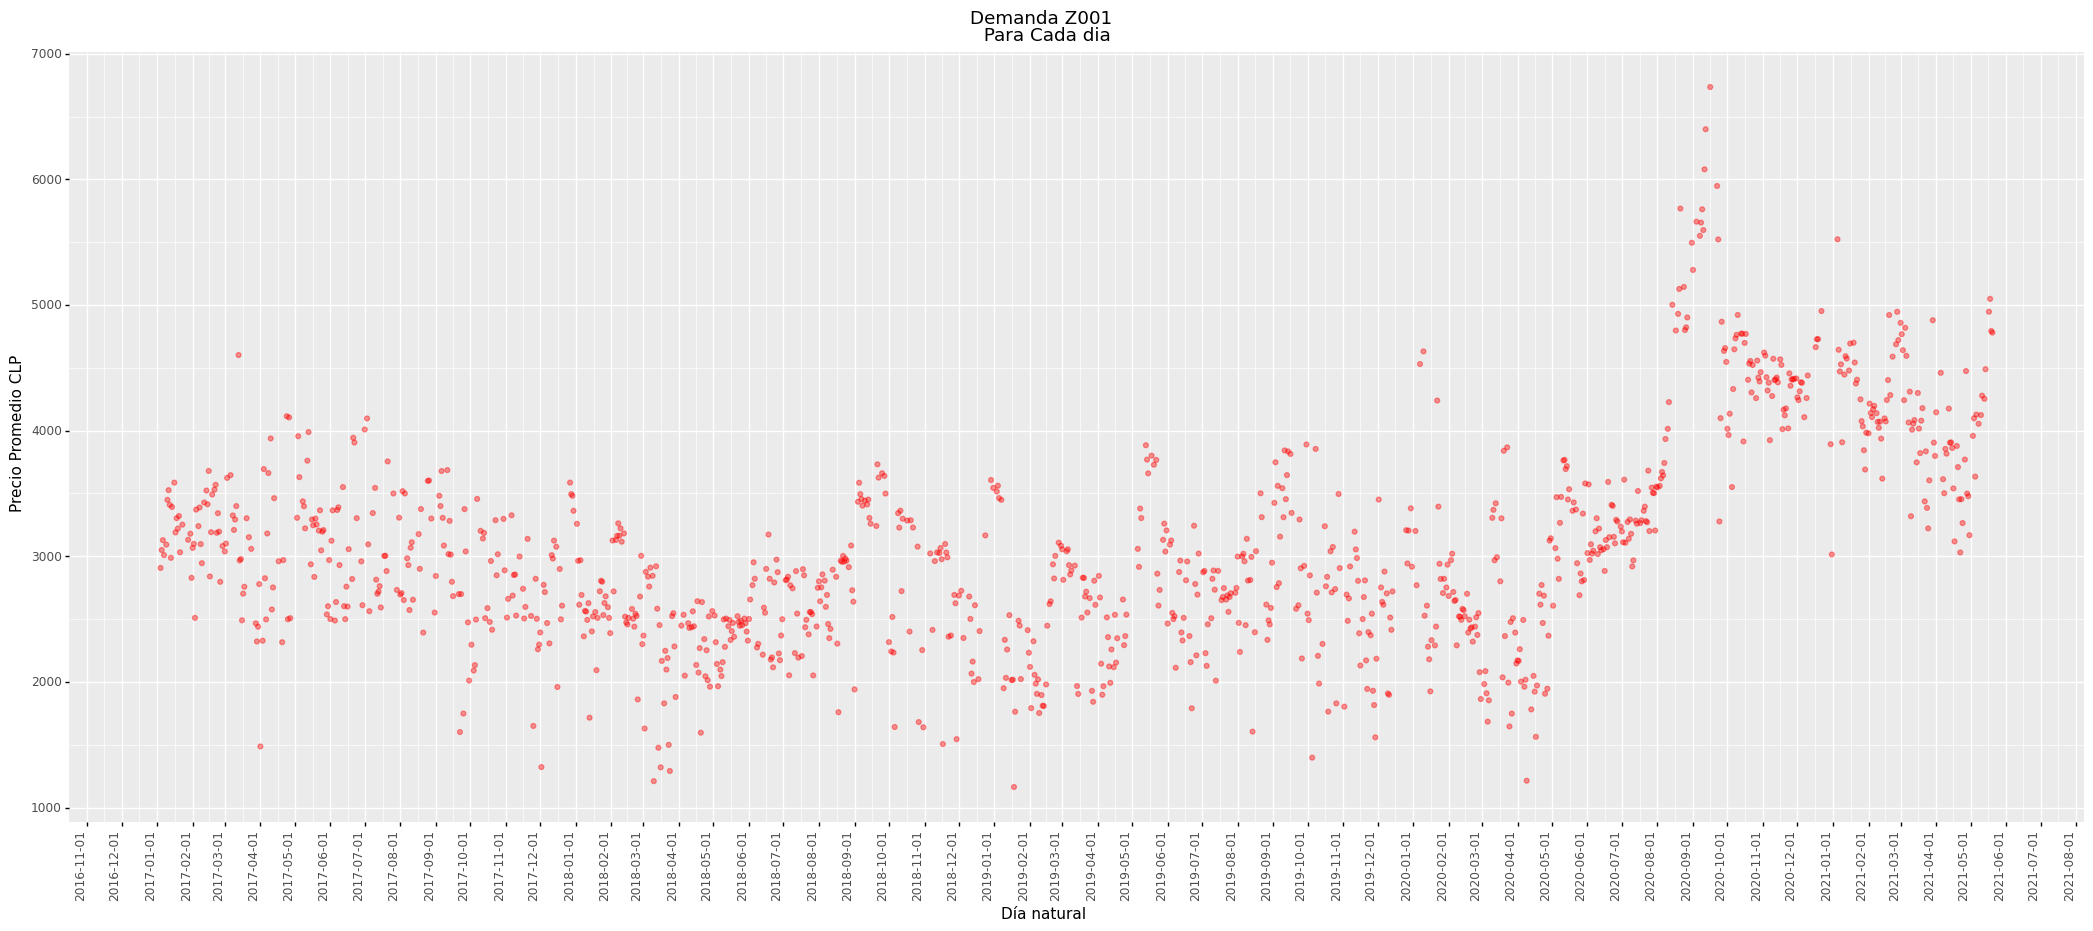

<ggplot: (97167176232)>

In [90]:
Prec=(
    ggplot(DF_Frecuent, aes(x='Día natural',y='Precio Promedio CLP'))                 
                + geom_point(color='red',alpha=0.4)\
                #+ labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Prec

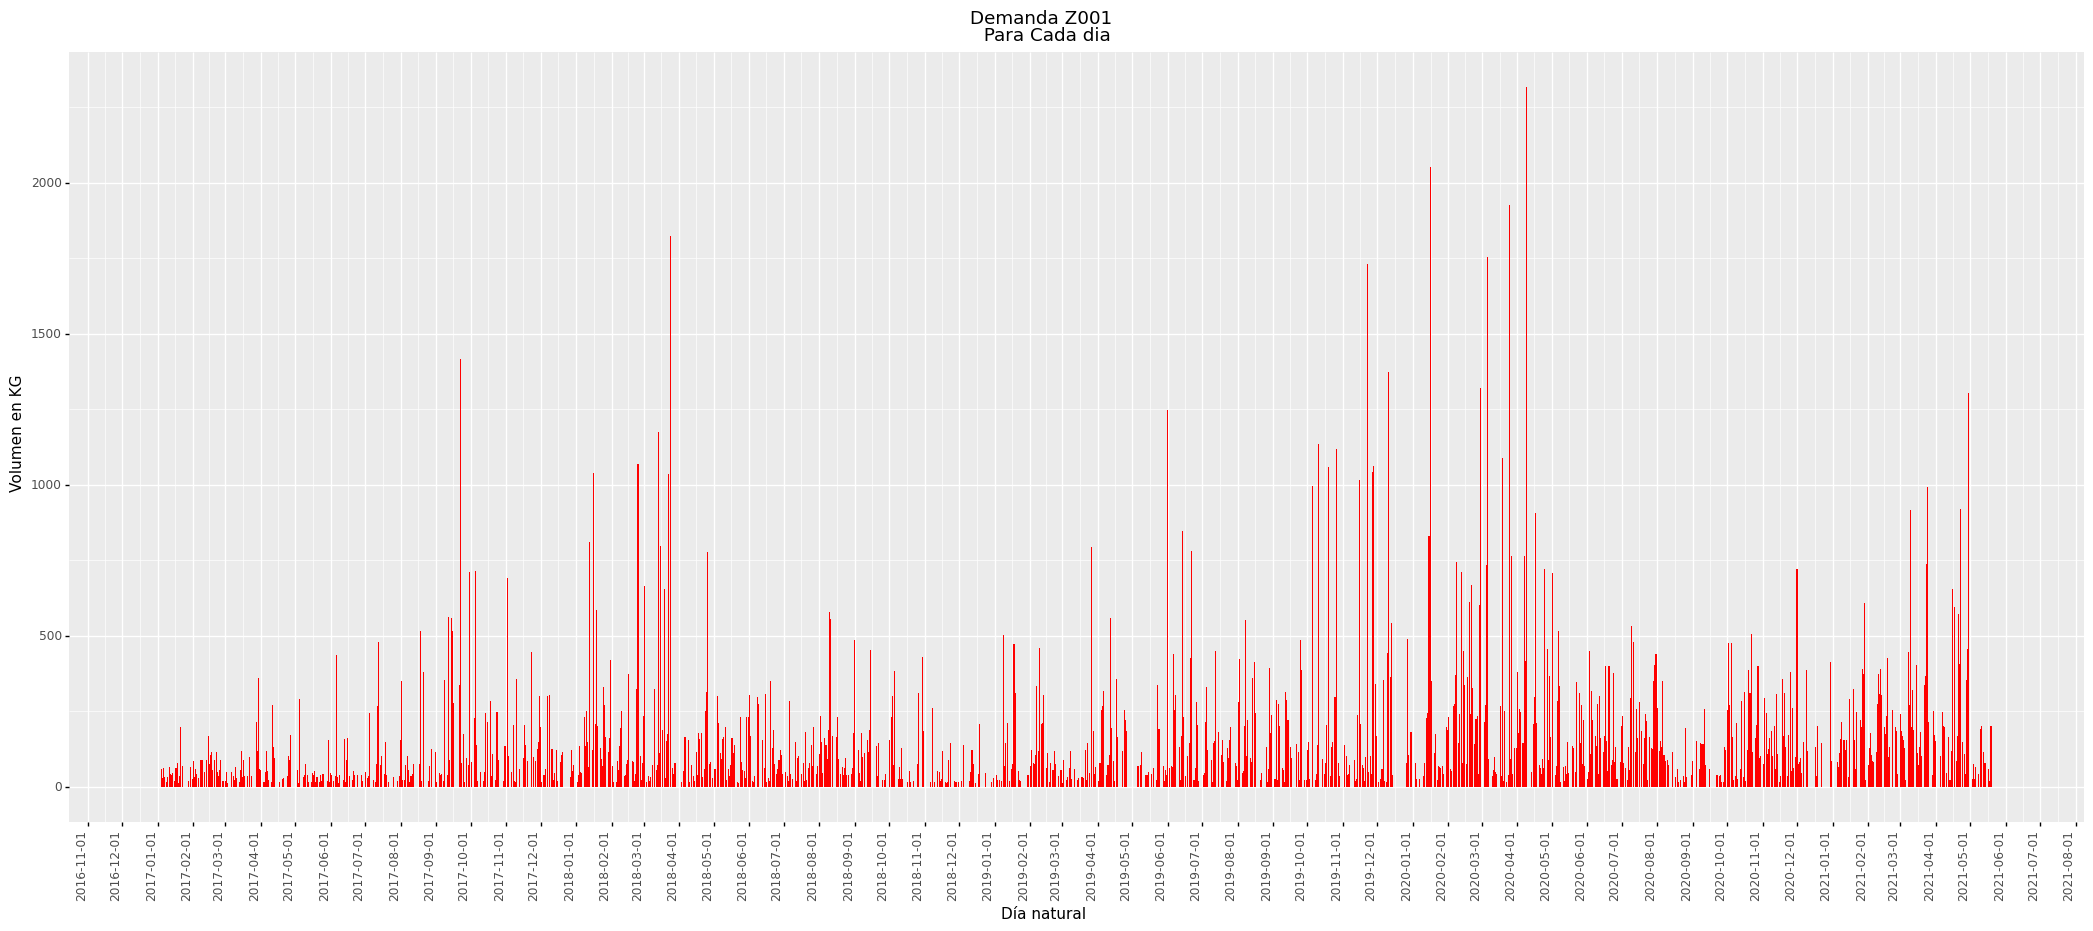

<ggplot: (97167061911)>

In [91]:
#DF_VS
Dem=(
    ggplot(DF_Frecuent, aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=1)\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Dem

In [92]:
DF_Frecuent[DF_Frecuent['Día natural']>=
datetime.date(2019, 1, 1)].head()

,Día natural,Año,Semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
485,2019-01-03,2019,1,41,144165,3516.219512
486,2019-01-04,2019,1,22,78365,3562.045455
487,2019-01-05,2019,1,22,76195,3463.409091
488,2019-01-07,2019,2,20,68985,3449.250000
489,2019-01-09,2019,2,502,979050,1950.298805


In [93]:
DF_Frecuent['Año']=DF_Frecuent['Día natural'].apply( lambda x: x.year)
DF_Frecuent['Año'].head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Año, dtype: int64

In [94]:
DF_Frecuent["Día natural"].head()

0    2017-01-04
1    2017-01-05
2    2017-01-06
3    2017-01-07
4    2017-01-09
Name: Día natural, dtype: object

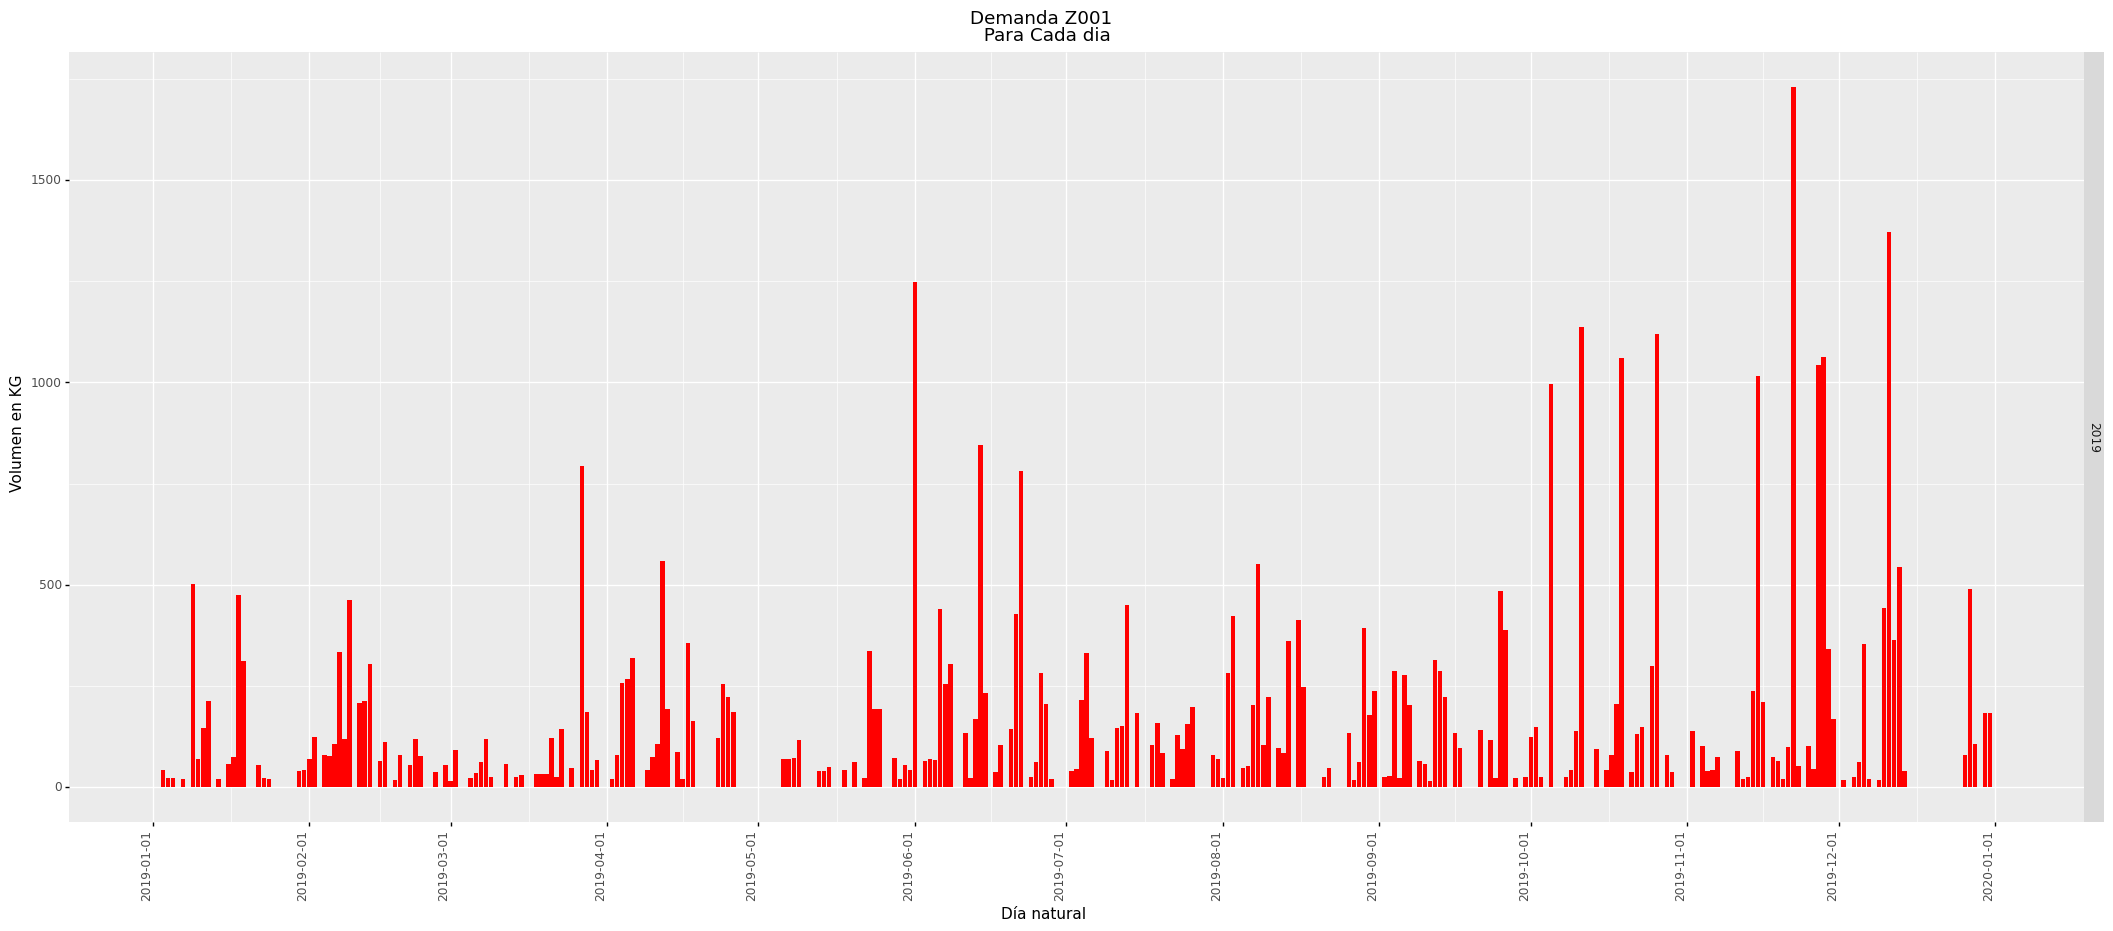

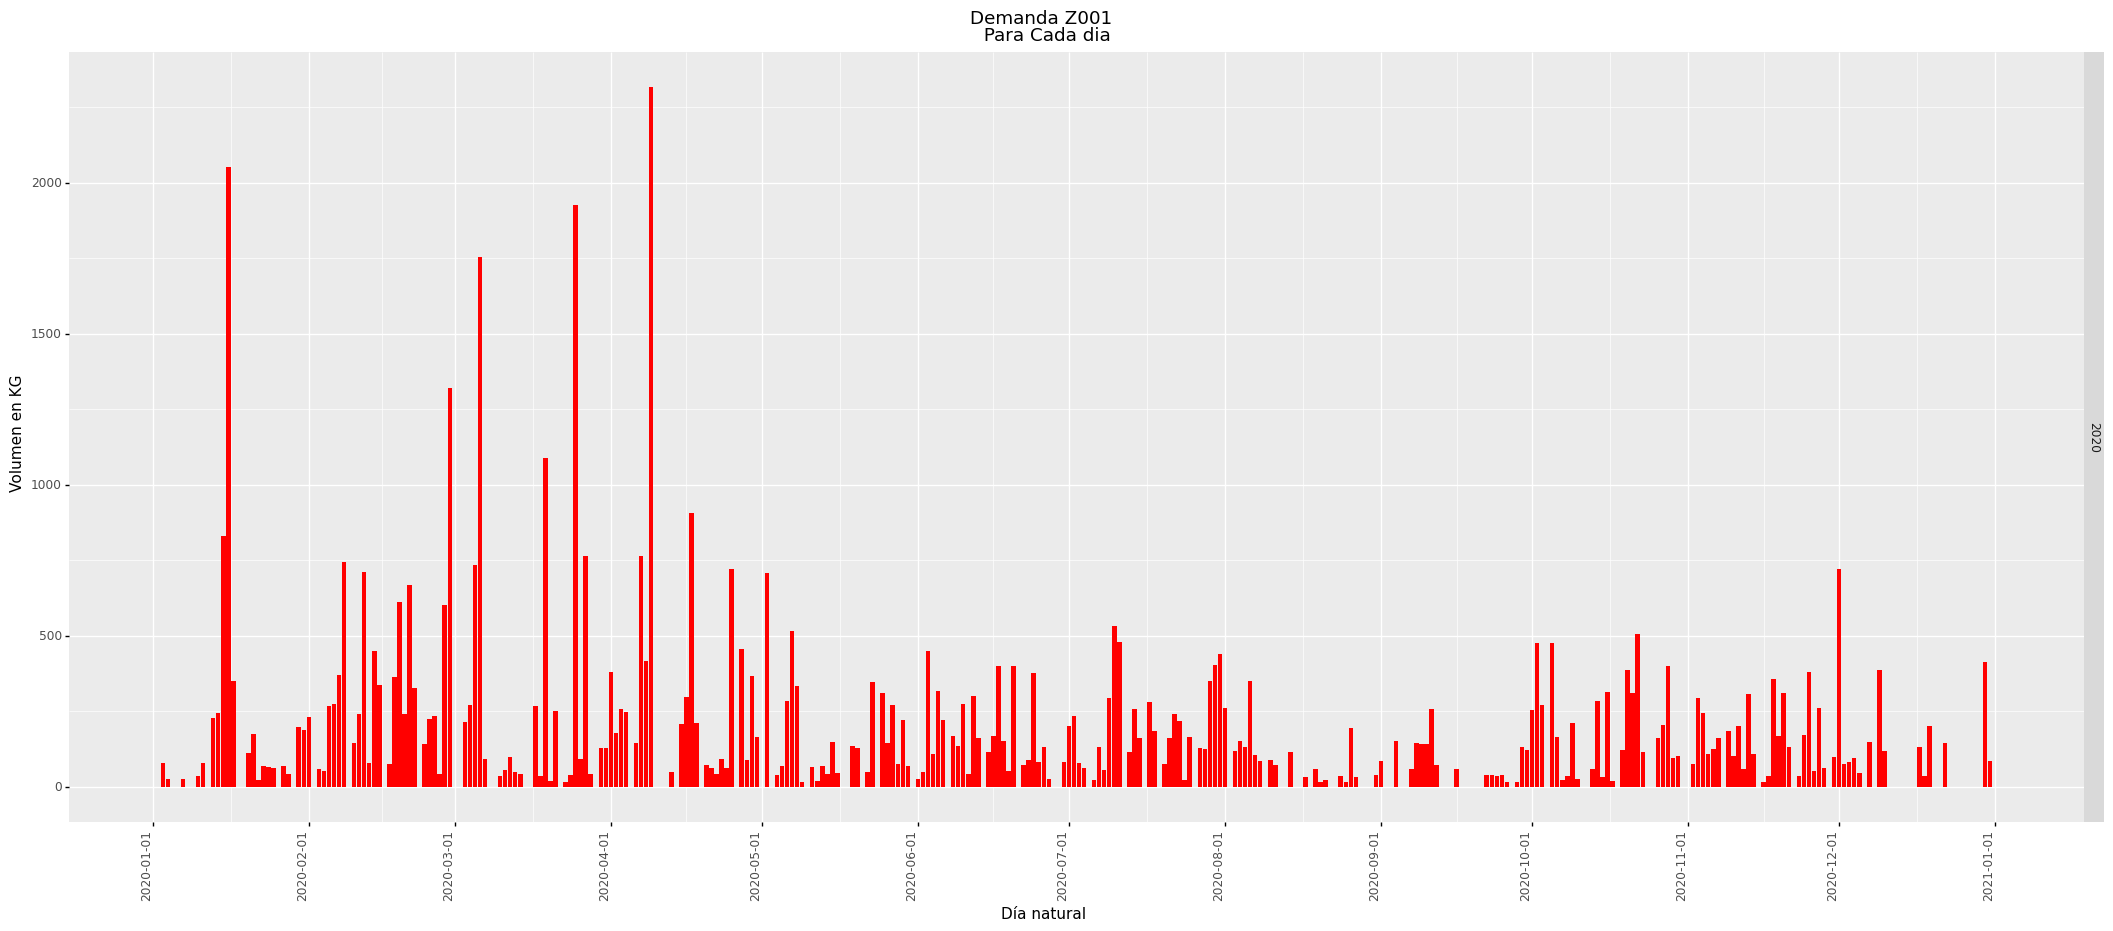

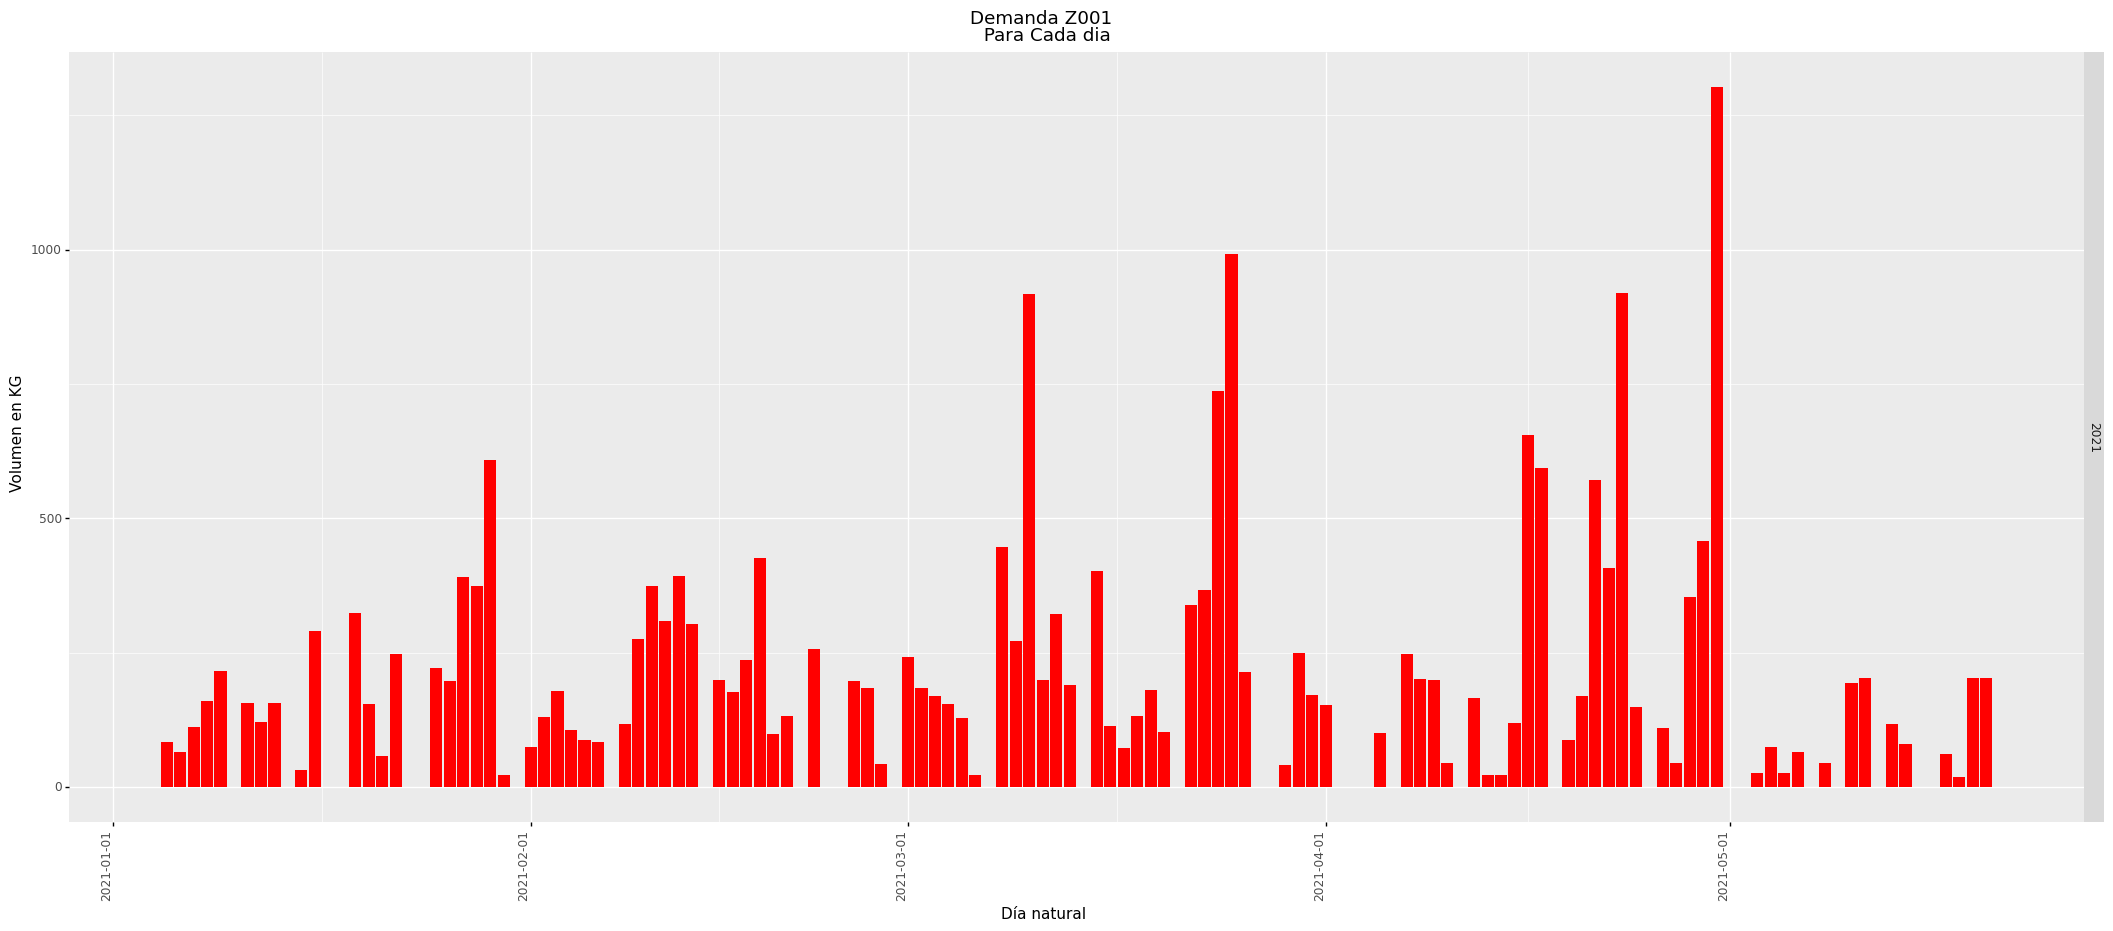

[<ggplot: (97167171045)>, <ggplot: (97167363238)>, <ggplot: (97040562399)>]

In [95]:
#DF_VS

Dem=[
    ggplot(DF_Frecuent[DF_Frecuent['Año']==i], aes(x='Día natural',y='Kilos Venta KG'))                 
                + geom_col(fill='red',alpha=1)\
                +facet_grid('Año~.')\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Demanda Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month')) for i in [2019,2020,2021]
]
Dem

In [96]:
DF_Frecuent.head(1)

,Día natural,Año,Semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
0,2017-01-04,2017,1,58,168634,2907.482759


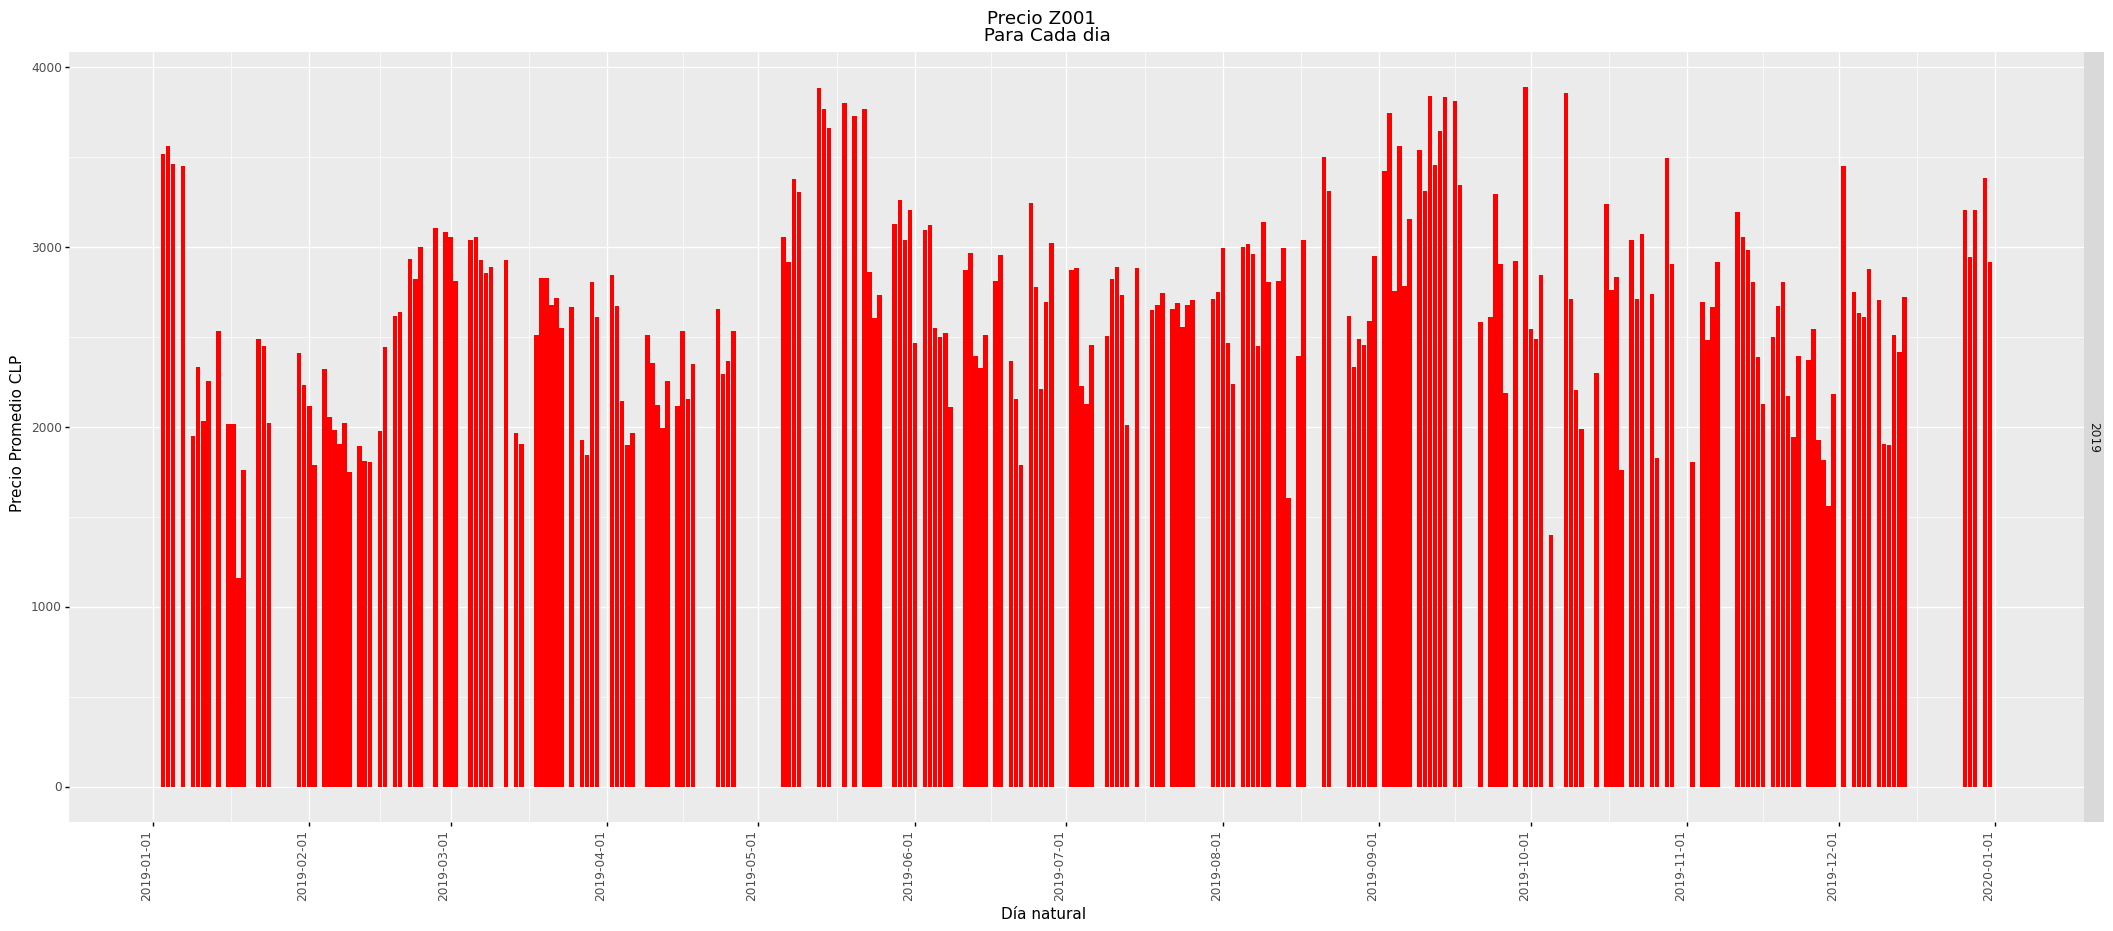

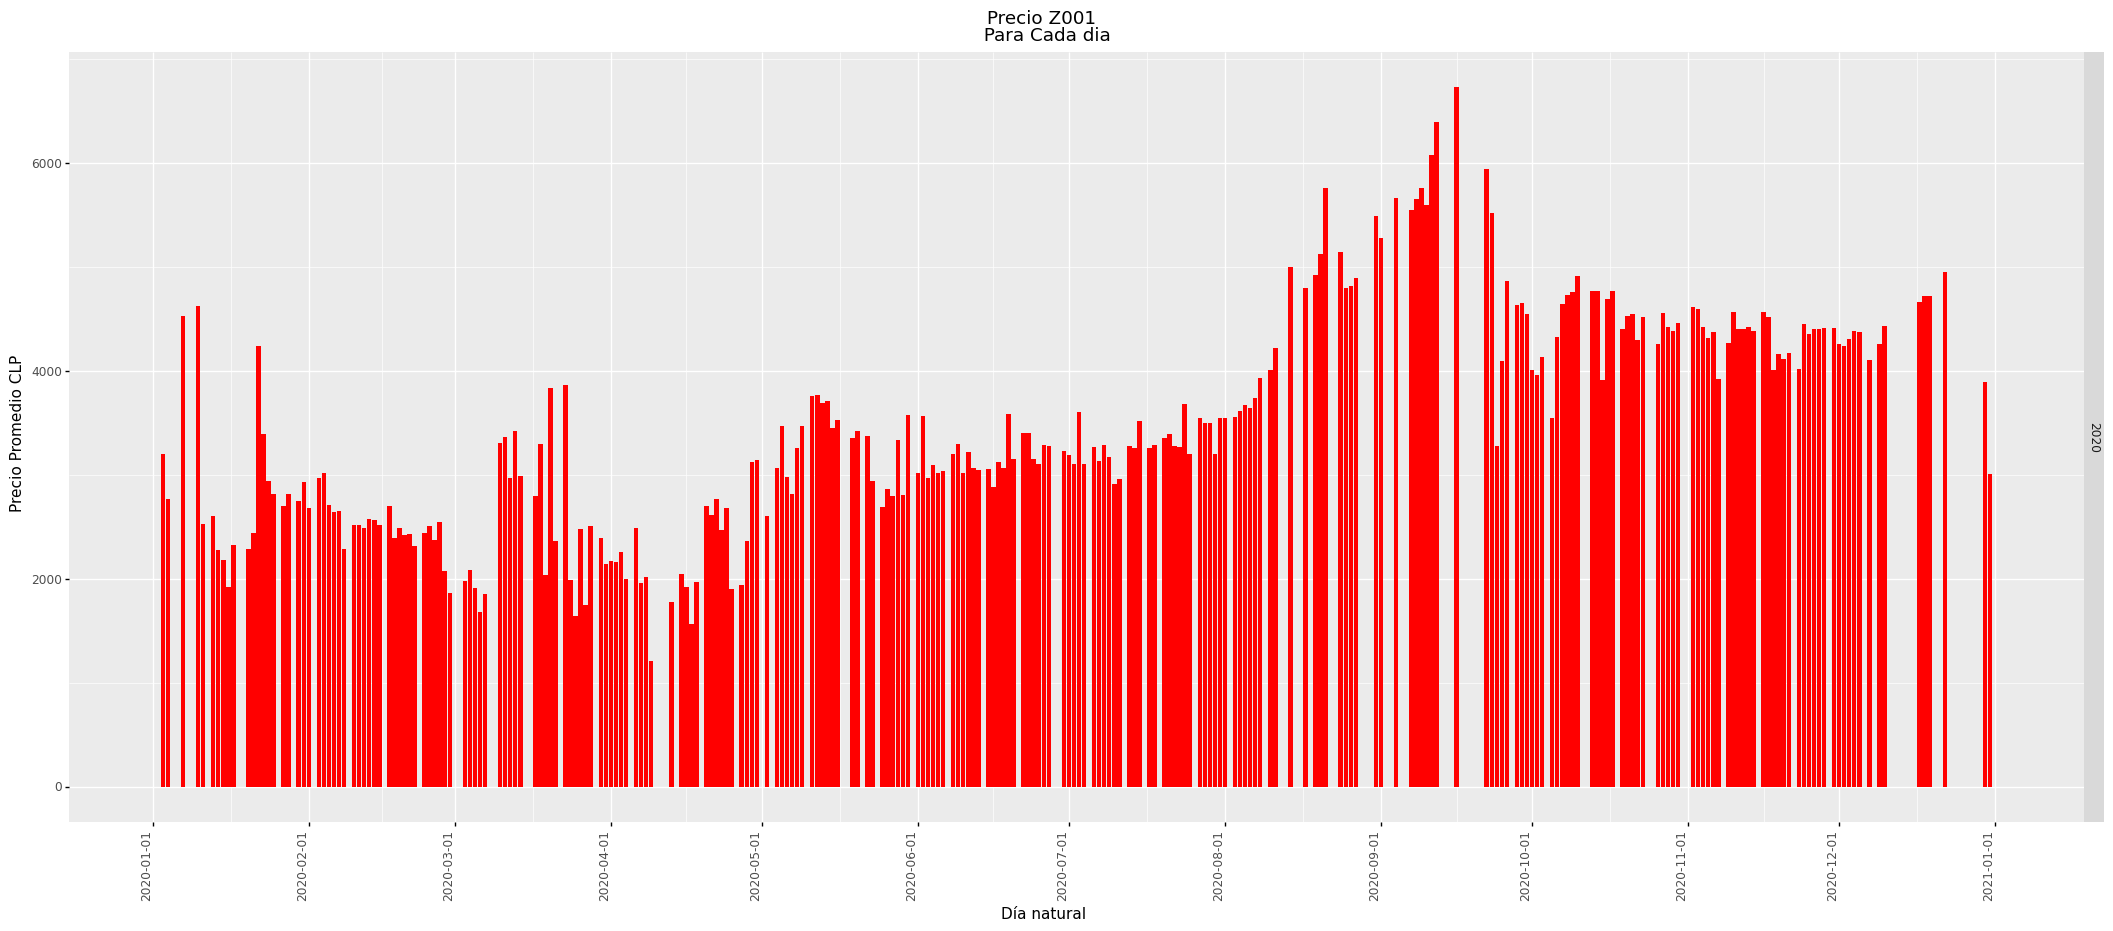

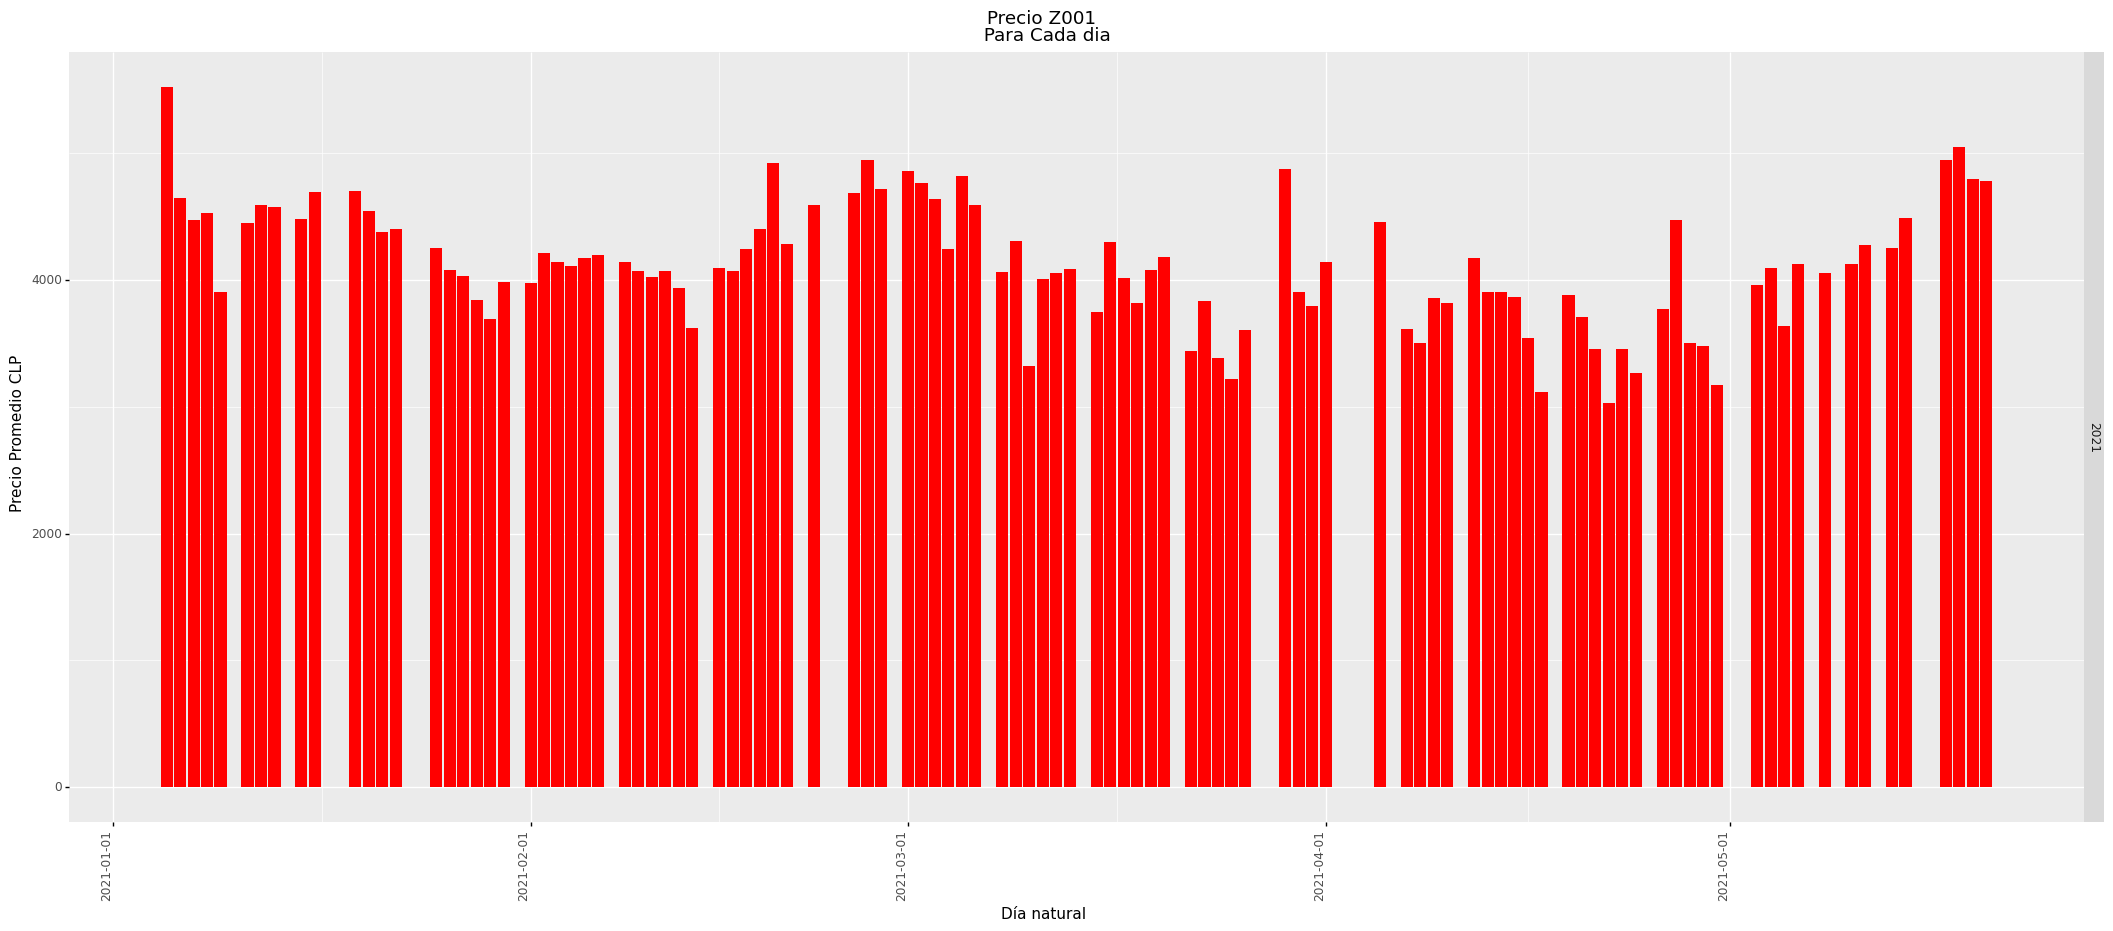

[<ggplot: (97040561104)>, <ggplot: (97167776175)>, <ggplot: (97167072865)>]

In [97]:
#DF_VS

Dem=[
    ggplot(DF_Frecuent[DF_Frecuent['Año']==i], aes(x='Día natural',y='Precio Promedio CLP'))                 
                + geom_col(fill='red',alpha=1)\
                +facet_grid('Año~.')\
                #+ labs(y='Volumen en KG',x='Día natural',size=14)\
                +ggtitle(('Precio Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month')) for i in [2019,2020,2021]
]
Dem

#### unificar años en 1 

In [98]:
def fecha(x):
    s=str(x.month)+'-'+str(x.day)
    return(s)
"""
DF_Frecuent['Día mes']=DF_Frecuent['Día natural'].apply( lambda x:fecha (x))
df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
"""                                                                           

'\nDF_Frecuent[\'Día mes\']=DF_Frecuent[\'Día natural\'].apply( lambda x:fecha (x))\ndf["Día natural"].apply(lambda x: \n                                                datetime.datetime.strptime(x,\n                                                                           \'%d.%m.%Y\').date())\n'

### Sección Prophet 

#### Data

In [99]:
fillN='Valores_prophet'
col_names=pd.read_csv(""+fillN+".csv",
                    encoding="utf-8",sep=",",nrows=0).columns
types_dict = {col: str for col in col_names}

DF_Predict = pd.read_csv(""+fillN+".csv",
                   encoding="utf-8",sep=",",dtype=types_dict)

DF_Predict = DF_Predict.rename(columns={'ds':"Día natural"})
DF_Predict["Día natural"] = DF_Predict["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%Y-%m-%d').date())
DF_Predict.head(1)
DF_Predict.head()

,Día natural,y,yhat,Error
0,2019-01-03,41,47.16291202721127,6.16291202721127
1,2019-01-04,22,123.3959494651005,101.3959494651005
2,2019-01-05,22,68.88366519807951,46.88366519807951
3,2019-01-07,20,-39.785590061974624,-59.785590061974624
4,2019-01-09,502,119.95539707408078,-382.0446029259192


### Union con Festivos DF_Fest,DF_Predict

In [100]:
DF_Fest2=pd.merge(DF_Fest,DF_Predict
                 , how='right')

#DF_Fest2.sort_values(by=['Día natural'], inplace=True)
print(DF_Fest2.shape)
DF_Fest2.head()#[DF_Fest.Año==2019].head(20)

(607, 21)


,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),...,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad,Día natural,Kilos Venta KG,Precio Promedio CLP,y,yhat,Error
0,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-03,41,3516.219512,41,47.16291202721127,6.16291202721127
1,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-04,22,3562.045455,22,123.3959494651005,101.3959494651005
2,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-05,22,3463.409091,22,68.88366519807951,46.88366519807951
3,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-07,20,3449.250000,20,-39.785590061974624,-59.785590061974624
4,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-09,502,1950.298805,502,119.95539707408078,-382.0446029259192


In [101]:
DF_Fest2.dtypes

Año                                                 int64
Semana                                              int64
año nuevo                                         float64
Semana santa                                      float64
Día Nacional del Trabajo                          float64
Día de las Glorias Navales                        float64
San Pedro y San Pablo                             float64
Día de la Virgen del Carmen                       float64
Asunción de la Virgen                             float64
Fiestas patrias(Viernes)                          float64
Encuentro de Dos Mundos                           float64
Día de las Iglesias Evangélicas y Protestantes    float64
Día de Todos los Santos                           float64
Inmaculada Concepción                             float64
Navidad                                           float64
Día natural                                        object
Kilos Venta KG                                      int64
Precio Promedi

<AxesSubplot:>

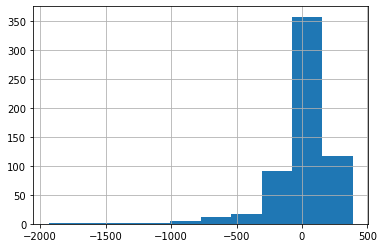

In [102]:
DF_Fest2.Error=DF_Fest2.Error.astype('float64')
DF_Fest2.Error.hist()

### Valore NAn


In [103]:
DF_Fest2.head()

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),...,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad,Día natural,Kilos Venta KG,Precio Promedio CLP,y,yhat,Error
0,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-03,41,3516.219512,41,47.16291202721127,6.162912
1,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-04,22,3562.045455,22,123.3959494651005,101.395949
2,2019,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-05,22,3463.409091,22,68.88366519807951,46.883665
3,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-07,20,3449.250000,20,-39.785590061974624,-59.785590
4,2019,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2019-01-09,502,1950.298805,502,119.95539707408078,-382.044603


In [104]:
DF_Fest2['Error'].isnull().sum()
DF_Fest2[DF_Fest2['Precio Promedio CLP'].isnull()== True]

,Año,Semana,año nuevo,Semana santa,Día Nacional del Trabajo,Día de las Glorias Navales,San Pedro y San Pablo,Día de la Virgen del Carmen,Asunción de la Virgen,Fiestas patrias(Viernes),...,Día de las Iglesias Evangélicas y Protestantes,Día de Todos los Santos,Inmaculada Concepción,Navidad,Día natural,Kilos Venta KG,Precio Promedio CLP,y,yhat,Error


### Guardar CSV 

In [105]:
DF_Fest2.to_csv('prophet_Fest.csv', index=False)

### Parte Redes neuronales
neural networks shape 

https://colab.research.google.com/drive/1HPcKN6IzB5uuj_MfqHcmBiSDsOjNeUBk#scrollTo=Ojn2s4BzpU4C

In [106]:
# Global imports and settings
#from preamble import *
import keras
print("Using Keras",keras.__version__)
%matplotlib inline
plt.rcParams['figure.dpi'] = 125 # Use 300 for PDF, 100 for slides
# InteractiveShell.ast_node_interactivity = "all"
#HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

ModuleNotFoundError: No module named 'keras'

In [ ]:
from keras import models
from keras import layers 

Para tener más control, puede crear explícitamente el optimizador, la pérdida y las métricas:

``` python
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
```

## Regresión
* Dataset: 506 ejemplos de casas y precios de venta (Boston)
    - Incluido en Keras, con una división de entrenamiento-prueba de 1/5
* Cada fila es un precio de la casa, descrito por propiedades numéricas de la casa y el vecindario
* Conjunto de datos pequeño, características no normalizadas

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

### Preprocesamiento
* Las redes neuronales funcionan mucho mejor si primero normalizamos las características. 
* Keras no tiene soporte incorporado, por lo que tenemos que hacer esto manualmente (o con scikit-learn)
    - Nuevamente, tenga cuidado de no mirar los datos de prueba durante la normalización
    
``` python
mean, std = train_data.mean(axis=0), train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std
```

In [ ]:
mean, std = train_data.mean(axis=0), train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

### Construyendo la red
* Este es un conjunto de datos pequeño, muy fácil de sobreajustar
    * Usamos 2 capas ocultas de 64 unidades cada una
* Utilice lotes más pequeños, más épocas
* Como queremos una salida escalar, la capa de salida es una unidad sin activación
* Loss function es Mean Squared Error (mayor penalización)
* La métrica de evaluación es Mean Absolute Error (más interpretable)
* También usaremos cross-validation, así que envolvemos la construcción del modelo en una función, de modo que podamos llamarla varias veces

``` python
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
```

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### Cross-validation
* Keras no tiene soporte para cross-validation
* Afortunadamente, podemos ajustar (o envolver) un modelo de Keras como una estimación de scikit-learn
* También podemos implementar cross-validation nosotros mismos (ver notebook)
* Generalmente hablando, cross-validation es complicado con las redes neuronales
    * Es posible que algunas dobladas no converjan o fluctúen en la inicialización aleatoria.
    
``` python
clf = KerasClassifier(build_model)
score = cross_val_score(clf, train_data, train_targets, scoring='neg_mean_absolute_error', cv=4, fit_params={'epochs': 100, 'batch_size':1, 'verbose':0});
```

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)
param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256],
              'verbose' : [0]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)

In [ ]:
# TODO: Check why MAE is different. Should actually use a pipeline
from sklearn.model_selection import cross_val_score
clf = KerasClassifier(build_model)
X = np.concatenate([train_data,test_data],axis=0)
y = np.concatenate([train_targets,test_targets],axis=0)
score = cross_val_score(clf, train_data, train_targets, scoring='neg_mean_absolute_error', cv=4,
                        fit_params={'epochs': 100, 'batch_size':1, 'verbose':0});
print("MAE: ", -np.mean(score))

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
print("MAE: ", np.mean(all_scores))

Entrena durante más tiempo (500 épocas) y realiza un seguimiento de las pérdidas después de cada época
(ver código en el notebook)

In [ ]:
from keras import backend as K
K.clear_session() # Memory clean-up

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

El modelo comienza a sobreajustarse después de la época 80.

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Vuelva a entrenar con un número optimizado de épocas

``` python
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
```

In [ ]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print("MAE: ", test_mae_score)

### Qué cosas recordar de este ejemplo 
* La regresión generalmente se realiza utilizando la pérdida de MSE y MAE para la evaluación
* Los datos de entrada siempre se deben escalar (independientemente del conjunto de prueba)
* Pequeños conjuntos de datos:
    - Utilizar cross-validation
    - Utilizar redes simples (non-deep)
    - Lotes más pequeños, más épocas